# Topic 28 - Microbes Classification

## EDA

### Libraries and Data loading

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

plt.rcParams["figure.dpi"] =  100
df = pd.read_csv('microbes.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)

### Structure of the dataset

Now we take a look at overall dataset structure

In [2]:
print('features:\n', df.columns, end='\n\n')
print(df.head(3), end='\n\n')
print(f'number of rows: {df.shape[0]}\nnumber of columns: {df.shape[1]}', end='\n\n')

features:
 Index(['Solidity', 'Eccentricity', 'EquivDiameter', 'Extrema', 'FilledArea',
       'Extent', 'Orientation', 'EulerNumber', 'BoundingBox1', 'BoundingBox2',
       'BoundingBox3', 'BoundingBox4', 'ConvexHull1', 'ConvexHull2',
       'ConvexHull3', 'ConvexHull4', 'MajorAxisLength', 'MinorAxisLength',
       'Perimeter', 'ConvexArea', 'Centroid1', 'Centroid2', 'Area', 'raddi',
       'microorganisms'],
      dtype='object')

   Solidity  Eccentricity  EquivDiameter  Extrema  FilledArea  Extent  \
0     10.70          15.8           5.43     3.75       0.785    8.14   
1      5.60          18.3           4.14     6.16       0.364    3.51   
2      8.32          19.8           4.63     6.66       0.415    5.85   

   Orientation  EulerNumber  BoundingBox1  BoundingBox2  ...  ConvexHull4  \
0         2.15         22.3          2.97          10.9  ...         2.97   
1        18.60         22.5          5.41          19.2  ...         5.47   
2        21.00         22.4          5.

We can see that the dataset has **30527** samples and **24** features. Target will be the last column - classify each microorganism.

In [3]:
from sklearn.model_selection import train_test_split

features = df.drop(columns=['microorganisms'])
target = df['microorganisms']

x_train_val, x_test, y_train_val, y_test = train_test_split(features, target, train_size=0.8, stratify=target, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, train_size=0.8, stratify=y_train_val, random_state=42)


Lets now investigate what types given features have.  
As well as check if we have any missing/zero values.

In [4]:
print(x_train.info(), end='\n\n')
print(y_train.info(), end='\n\n')
print('missing values in features: ', (x_train.isna().any().any()))
print('missing values in target: ', (y_train.isna().any().any()))
print('zero values in features: ', (x_train==0.0).any().any())
print('zero values in target: ', (y_train==0.0).any().any())

<class 'pandas.core.frame.DataFrame'>
Index: 19536 entries, 21996 to 26274
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Solidity         19536 non-null  float64
 1   Eccentricity     19536 non-null  float64
 2   EquivDiameter    19536 non-null  float64
 3   Extrema          19536 non-null  float64
 4   FilledArea       19536 non-null  float64
 5   Extent           19536 non-null  float64
 6   Orientation      19536 non-null  float64
 7   EulerNumber      19536 non-null  float64
 8   BoundingBox1     19536 non-null  float64
 9   BoundingBox2     19536 non-null  float64
 10  BoundingBox3     19536 non-null  float64
 11  BoundingBox4     19536 non-null  float64
 12  ConvexHull1      19536 non-null  float64
 13  ConvexHull2      19536 non-null  float64
 14  ConvexHull3      19536 non-null  float64
 15  ConvexHull4      19536 non-null  float64
 16  MajorAxisLength  19536 non-null  float64
 17  MinorAxisLeng

As we can see the dataset does not have any missing points, however, it has zero values, which needs to be investigated further.

In [5]:
x_train.describe()

Solidity  Eccentricity  EquivDiameter       Extrema    FilledArea  \
count  19536.000000  19536.000000   19536.000000  19536.000000  19536.000000   
mean       9.684724     19.475353       3.627856     11.869358      0.417562   
std        4.051480      3.469683       2.214713      6.068893      0.871785   
min        0.000000      0.000000       0.000000      0.000000      0.000000   
25%        6.630000     17.300000       2.180000      6.760000      0.093700   
50%        9.360000     20.700000       3.370000     12.000000      0.228000   
75%       12.600000     22.200000       4.570000     17.200000      0.432000   
max       23.000000     23.000000      23.000000     23.000000     23.000000   

             Extent   Orientation   EulerNumber  BoundingBox1  BoundingBox2  \
count  19536.000000  19536.000000  19536.000000  19536.000000  19536.000000   
mean       5.847227     11.724373     22.381045     10.922155     10.369667   
std        3.240655      6.609031      0.972343      6.113965      5.792505   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        3.310000      5.910000     22.300000      5.690000      5.710000   
50%        5.270000     12.100000     22.600000     10.900000     10.000000   
75%        7.870000     17.200000     22.900000     15.800000     14.900000   
max       23.000000     23.000000     23.000000     23.000000     23.000000   

       ...   ConvexHull3   ConvexHull4  MajorAxisLength  MinorAxisLength  \
count  ...  19536.000000  19536.000000     19536.000000     19536.000000   
mean   ...     11.051122     11.026235         1.607533         1.015712   
std    ...      6.112046      6.110457         1.699920         1.268348   
min    ...      0.000000      0.000000         0.000000         0.000000   
25%    ...      5.760000      5.745000         0.635000         0.421000   
50%    ...     11.000000     11.000000         1.150000         0.743000   
75%    ...     15.900000     15.900000         2.050000         1.210000   
max    ...     23.000000     23.000000        23.000000        23.000000   

          Perimeter    ConvexArea     Centroid1     Centroid2          Area  \
count  19536.000000  19536.000000  19536.000000  19536.000000  19536.000000   
mean       0.829442      0.259997     11.753951     11.524800      0.801763   
std        1.173987      1.042430      6.048938      5.688628      1.180746   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.253000      0.035000      6.560000      7.100000      0.218000   
50%        0.512000      0.085200     12.000000     11.100000      0.510000   
75%        0.960000      0.196000     16.900000     16.100000      0.929000   
max       23.000000     23.000000     23.000000     23.000000     23.000000   

              raddi  
count  19536.000000  
mean       5.206181  
std        2.797916  
min        0.000000  
25%        3.010000  
50%        5.320000  
75%        7.050000  
max       23.000000  

[8 rows x 24 columns]

Each feature has a minimal value of 0.0 and maximal value of 23.0, that can indicate that some preprocessing of the data was already done.

In [6]:
print('number of zero values overall: ', (x_train == 0.0).any(axis=1).sum())

number of zero values overall:  166


As 158 samples is not big quantity, comparing to the number of samples in data set, and as from description of the data set we don't know what kind of preprocessing was done, we decide to keep rows, containing zeros.

### Duplicates

We need to see if we have any duplicates in samples.

In [7]:
print(x_train.join(y_train).duplicated().value_counts(), end='\n\n')

True     14875
False     4661
Name: count, dtype: int64



Then we make a version without duplicates.

In [8]:
train_df_no_dupl = x_train.join(y_train).drop_duplicates(keep='first')

During modelling we will try different versions of data set: with and without duplicates to invistigate if dropping them influence models.

### Distribution of classes

Lets investigate given classes in a more precise manner.

number of classes:  10


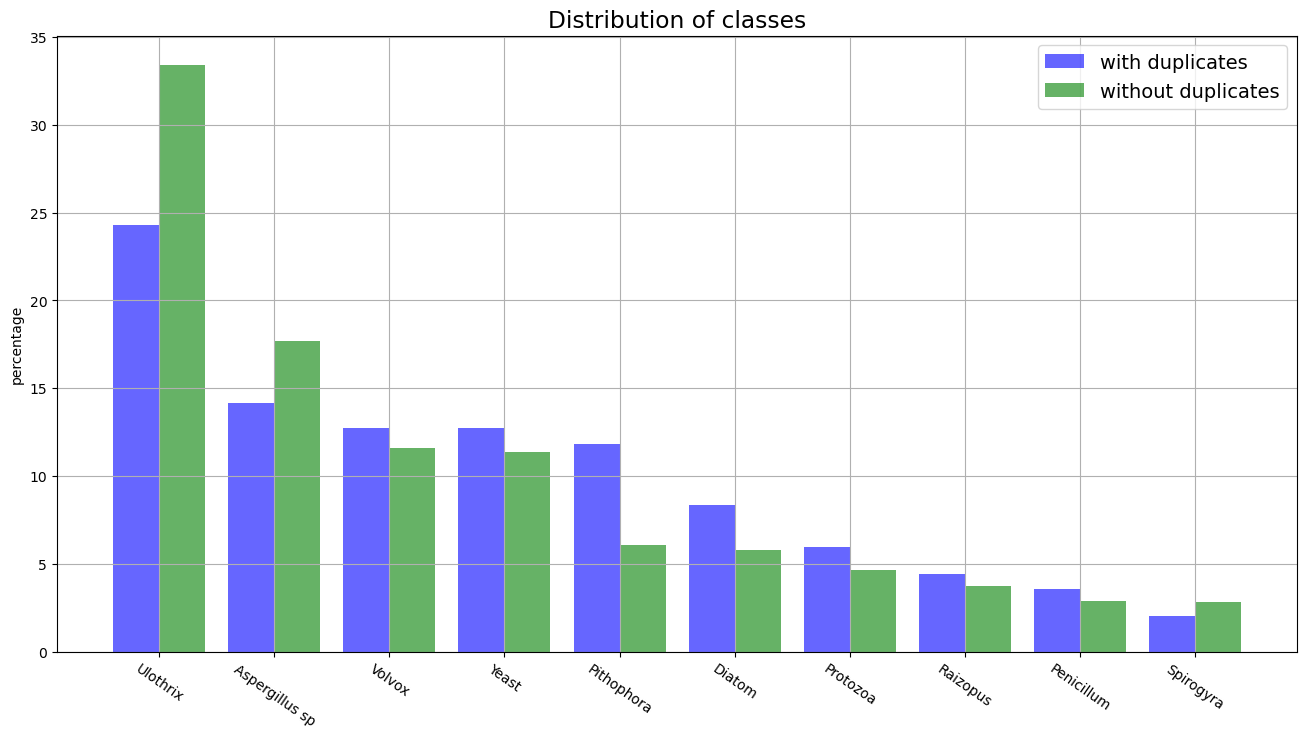

In [9]:
class_distribution = y_train.value_counts(normalize=True)*100
class_distrib_duplicates = train_df_no_dupl['microorganisms'].value_counts(normalize=True)*100

print('number of classes: ', len(class_distribution))

fig, ax = plt.subplots(figsize=(16, 8))
plt.rcParams.update({'font.size': 14})
indices = np.arange(0,10,1)

bar_width = 0.4
bars1 = ax.bar(indices, class_distribution, bar_width, label='with duplicates', color='blue', alpha=0.6)
bars2 = ax.bar(indices + bar_width, class_distrib_duplicates, bar_width, label='without duplicates', color='green', alpha=0.6)

ax.set_ylabel('percentage')
ax.set_xticks(indices + bar_width / 2)
ax.set_xticklabels(class_distrib_duplicates.index)


plt.title('Distribution of classes')
plt.xticks(rotation= -35)
plt.grid()
plt.legend()

We can observe that dataset is **highly** imbalanced, that is the reason to use stratify method in train_test_split.

### Boxplots and outliers

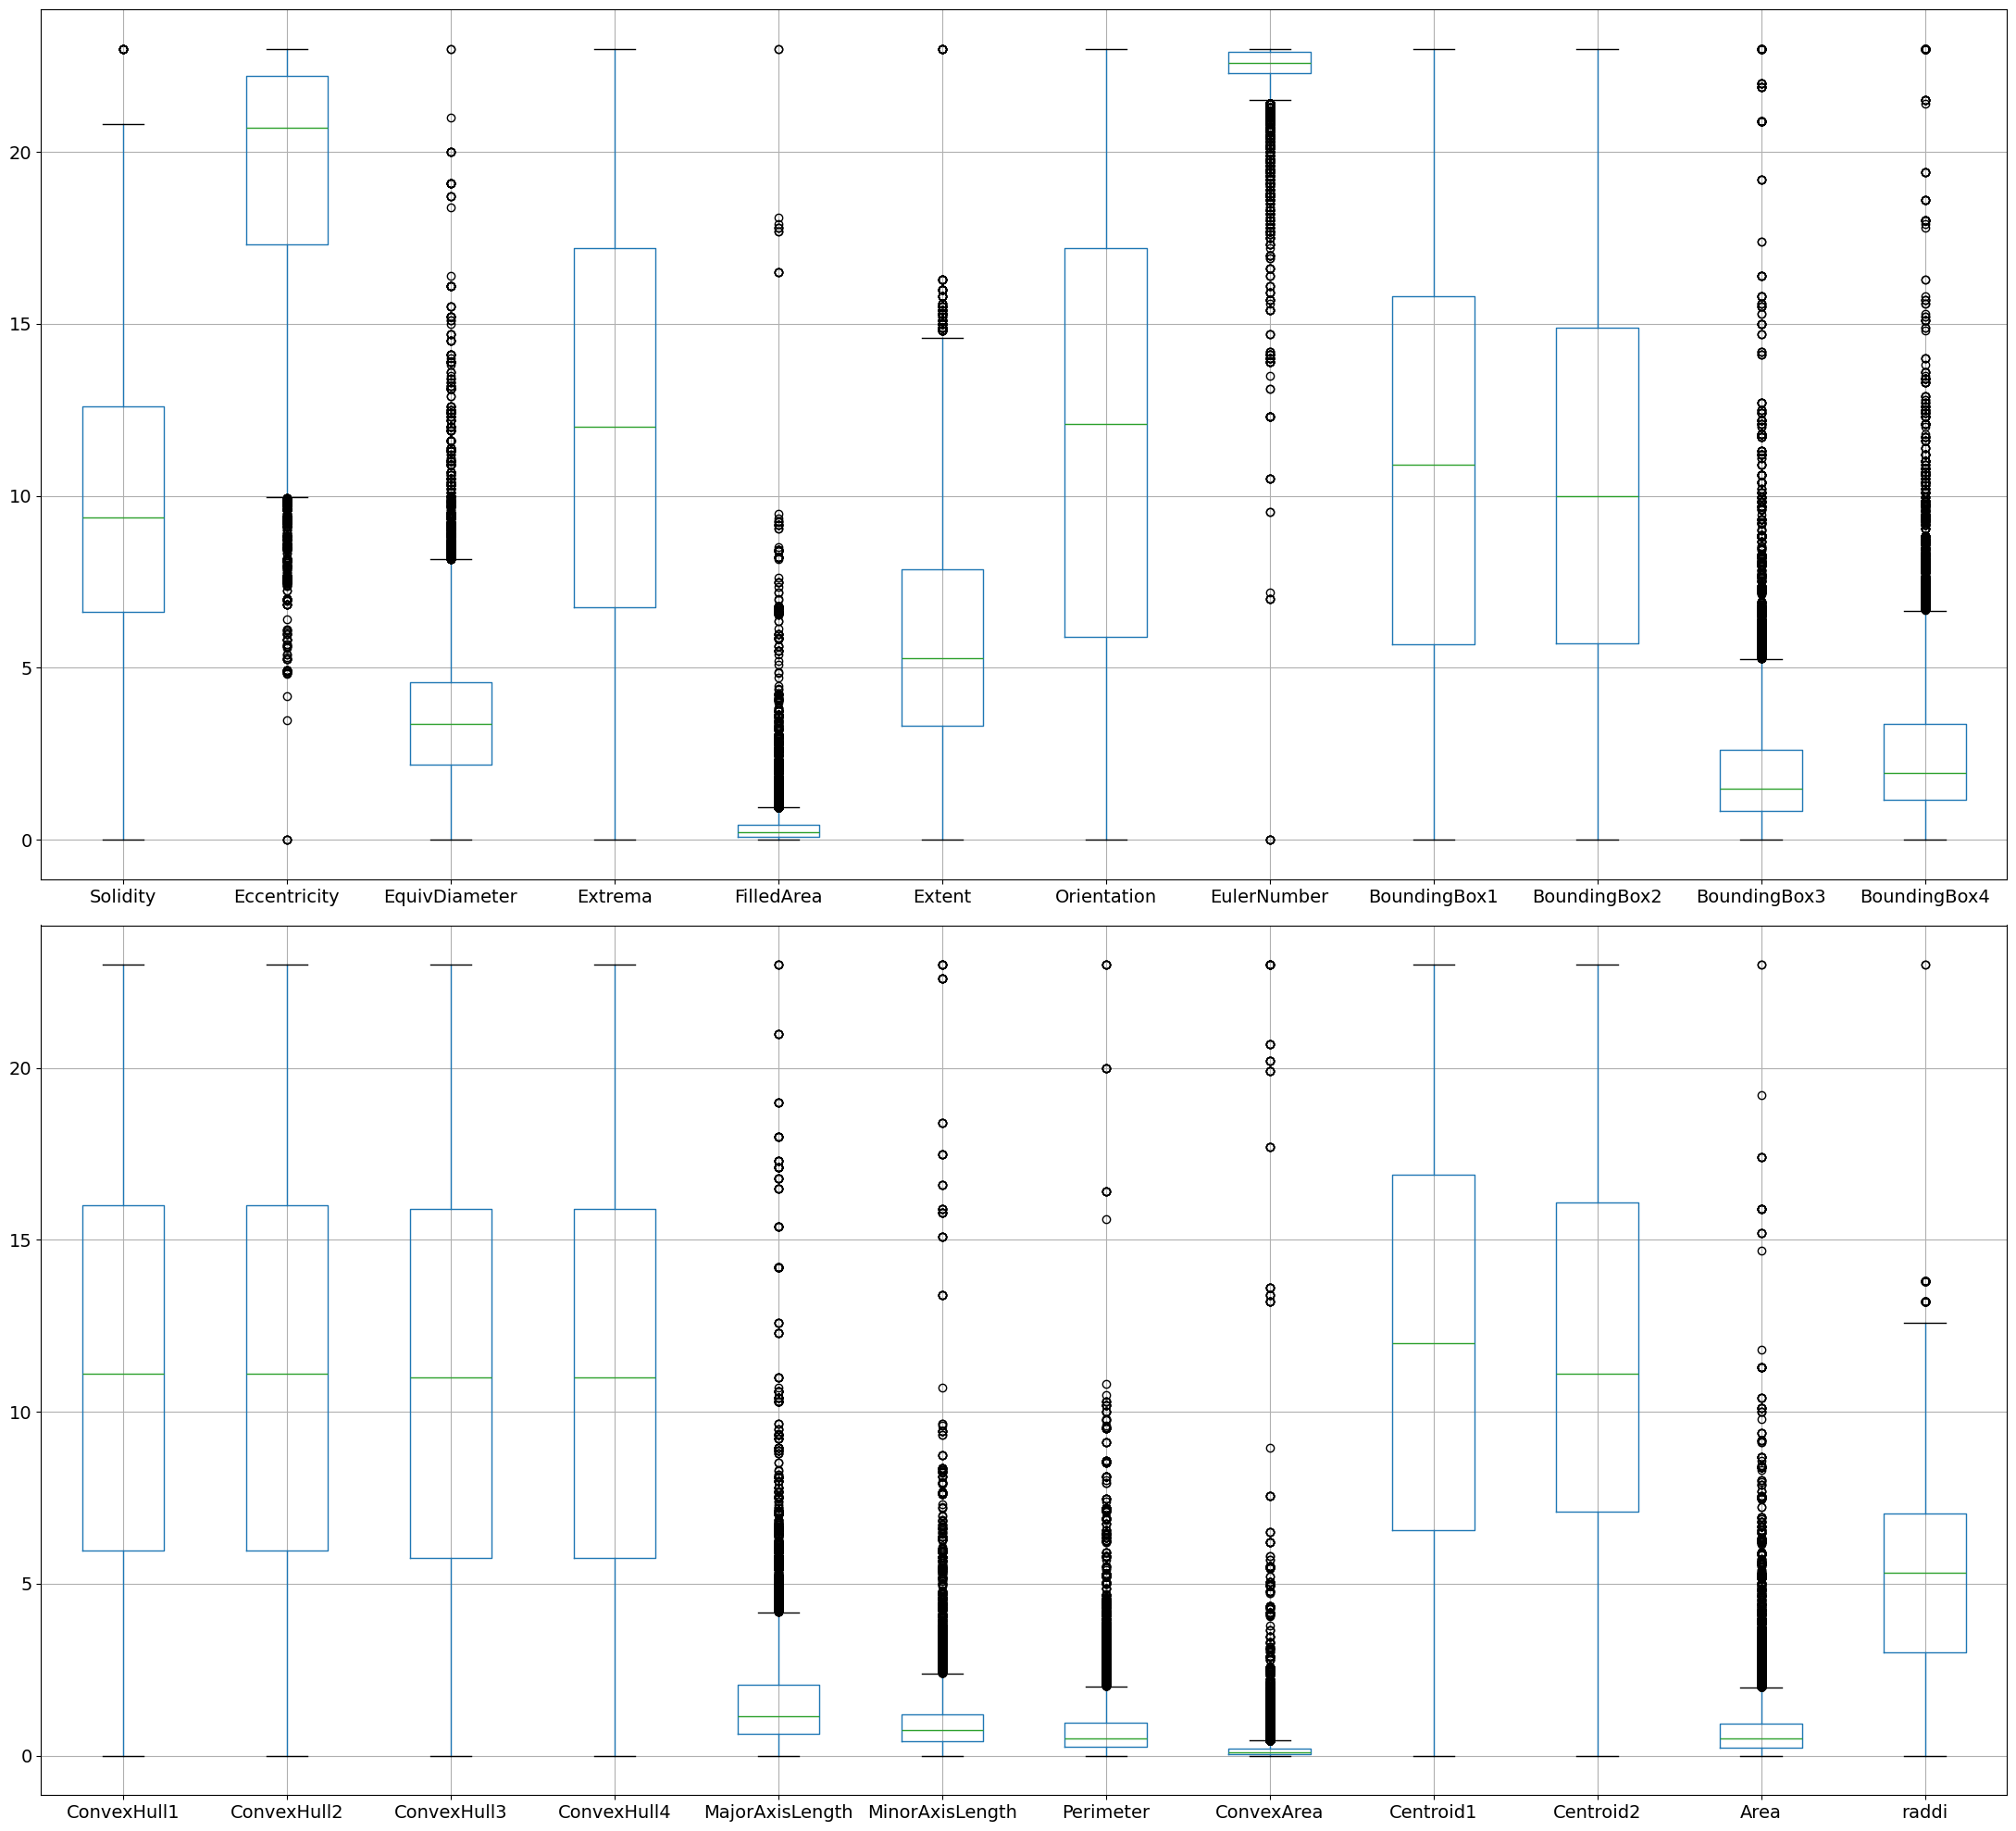

In [10]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(22, 20))
x_train.boxplot(ax=ax1, column=list(x_train.columns)[:12], fontsize=14)
x_train.boxplot(ax=ax2, column=list(x_train.columns)[12:], fontsize=14)
plt.tight_layout()

From the boxplots above we can clearly see that the dataset contains a lot of extreme outliers. There are different ways to calculate outliers, namely using quantiles and standard deviation.

Firstly we calculate number of outliers using quantiles.

In [11]:
q25 = x_train.quantile(q=0.25)
q50 = x_train.quantile(q=0.50)
q75 = x_train.quantile(q=0.75)
iqr = q75 - q25
lower_bound = q25 - 1.5 * iqr
upper_bound = q75 + 1.5 * iqr

In [12]:
iqr_outliers = x_train[(x_train < lower_bound) | (x_train > upper_bound)].any(axis=1)

print('Number of outliers using IQR:', iqr_outliers.sum().max())

Number of outliers using IQR: 3597


Secondly we find outliers using standard deviation.

In [13]:
std = x_train.std(axis=0)
mean = x_train.mean(axis=0)
outliers = (abs(x_train - mean) > (3 * std))

print('Number of outliers using std:', outliers.sum().max())

Number of outliers using std: 368


We see that the number of outliers, calculated using IQR is 10 times bigger, using std. Then we will work with outliers using different transformators and comparing there influence on models.

### Distribution of features

<Figure size 2200x2000 with 0 Axes>

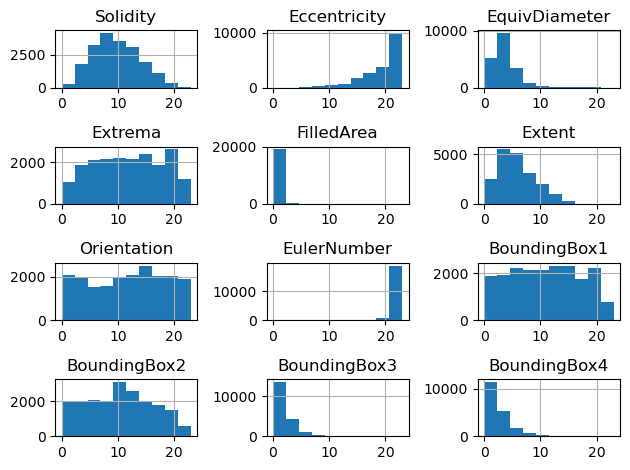

In [14]:
plt.rcParams.update({'font.size': 10})
plt.figure(figsize=(22, 20))
x_train[x_train.columns[:12]].hist()
plt.tight_layout()

In [15]:
plt.rcParams.update({'font.size': 10})
plt.figure(figsize=(22, 20))
x_train[x_train.columns[12:]].hist()
plt.tight_layout()

<Figure size 2200x2000 with 0 Axes>

We notice that the distribution of features is rarely standard, as well, some parameters take smaller values, then others. During modelling we will try a few transformers.

### Corellation matrix

<Axes: >

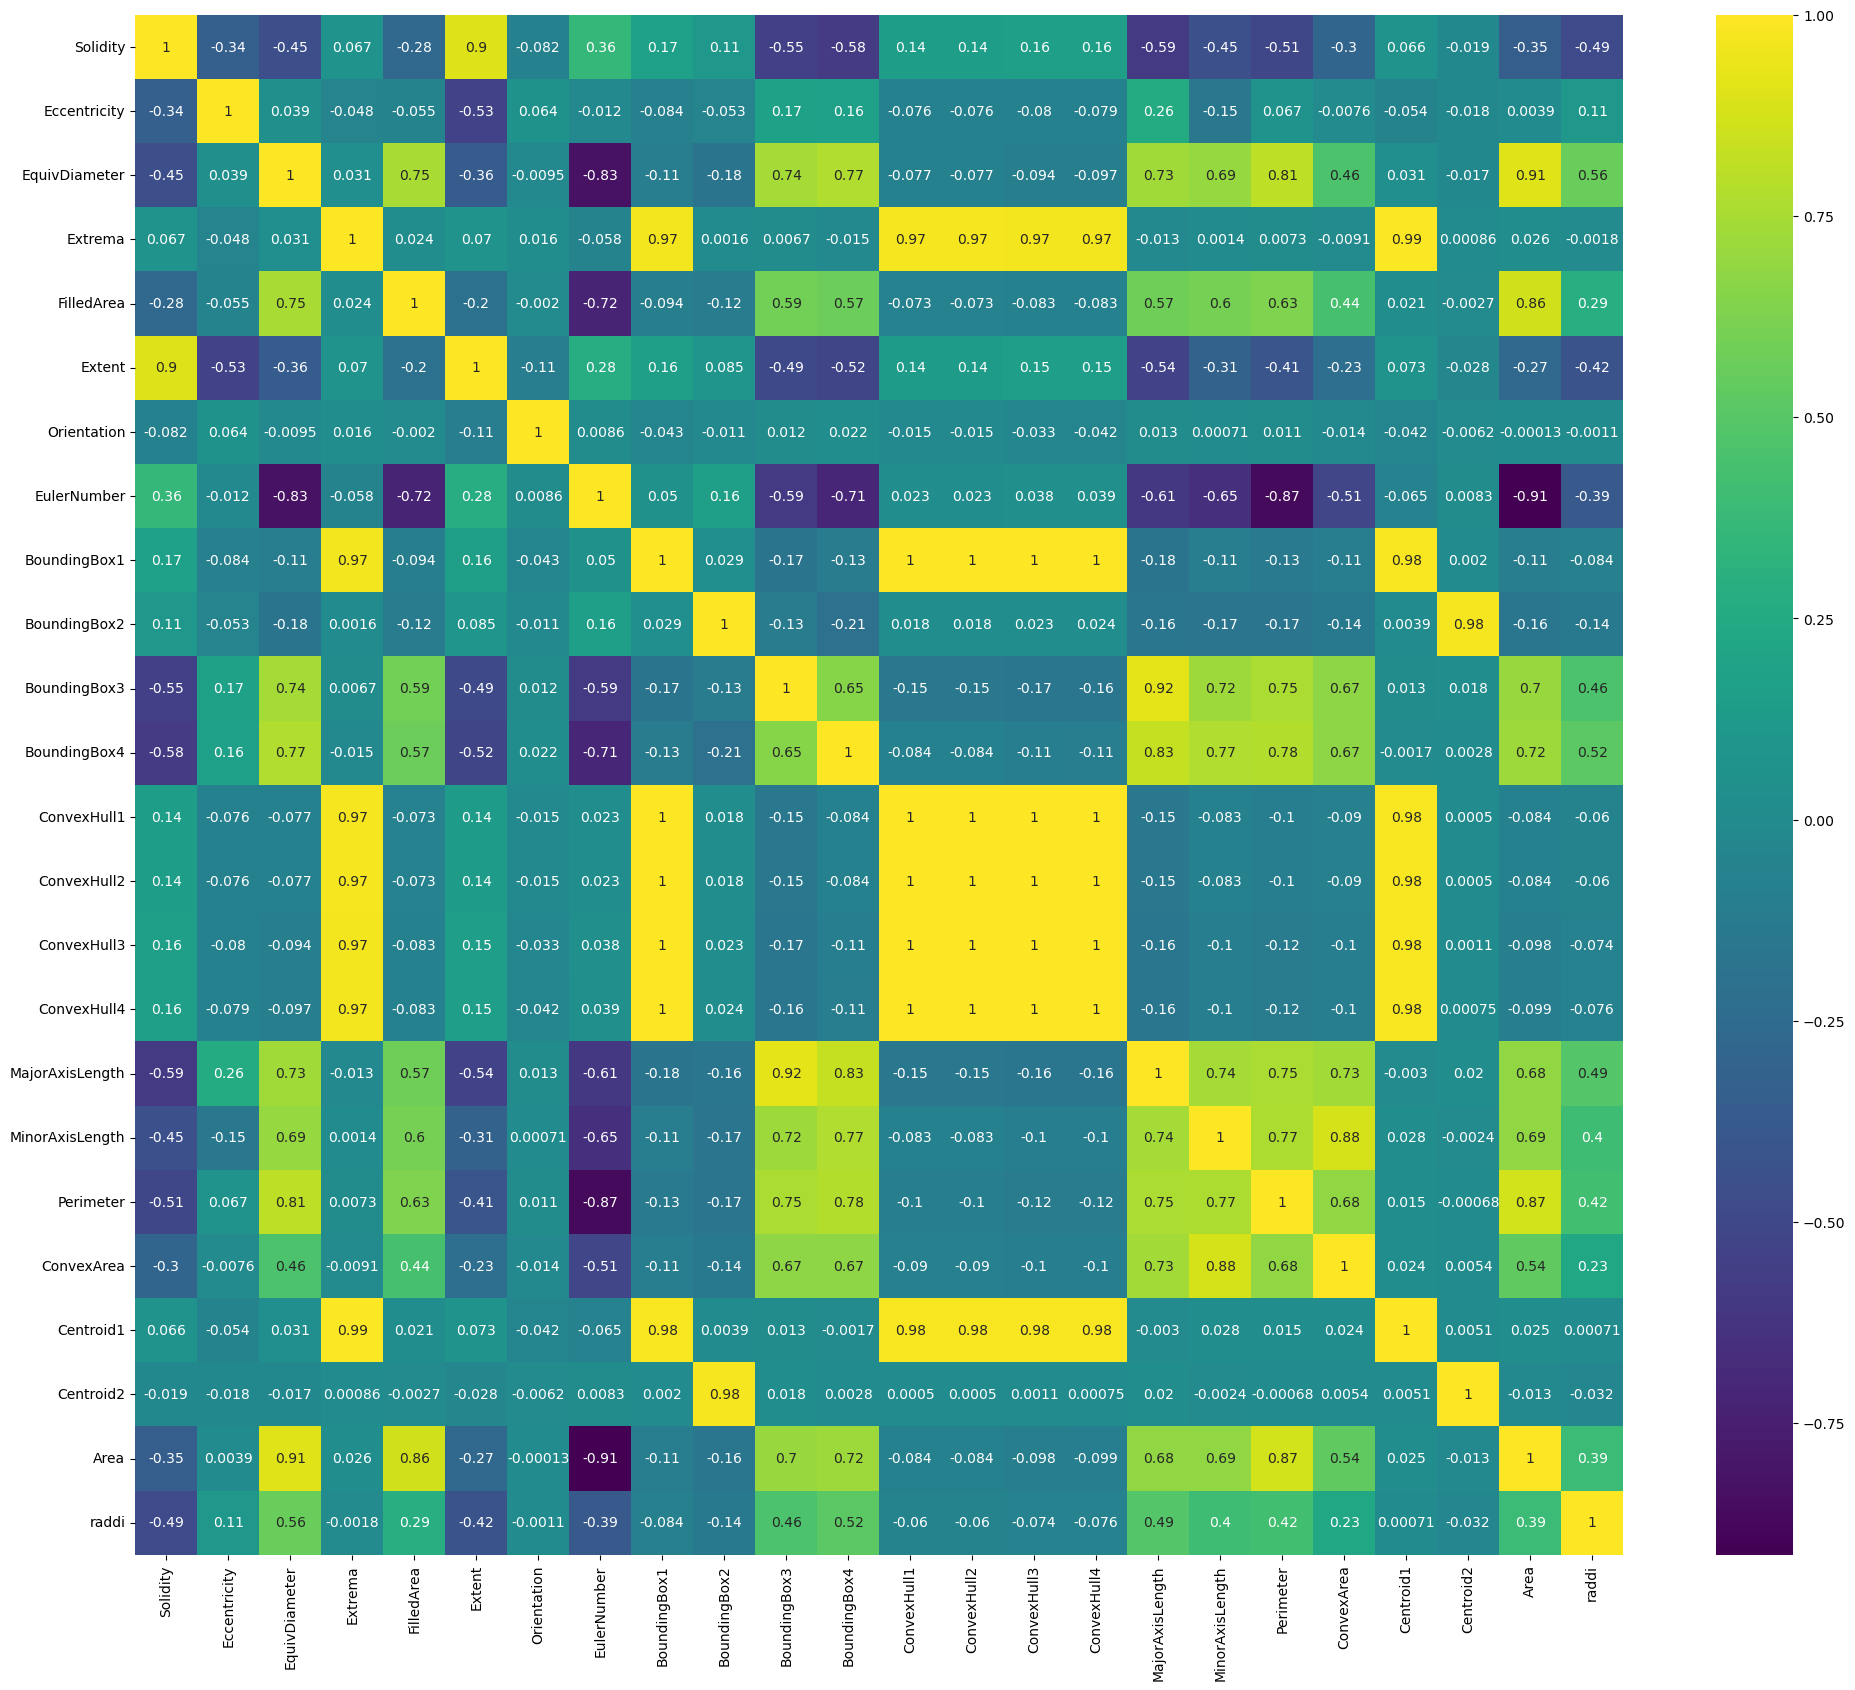

In [16]:
matrix = x_train.corr()
plt.figure(figsize=(24,20))
sns.heatmap(matrix, cmap="viridis", annot=True)

Having correlation coef equal to 1 and approximately equal to 1 is suspicuos, so we will look at these columns closer.

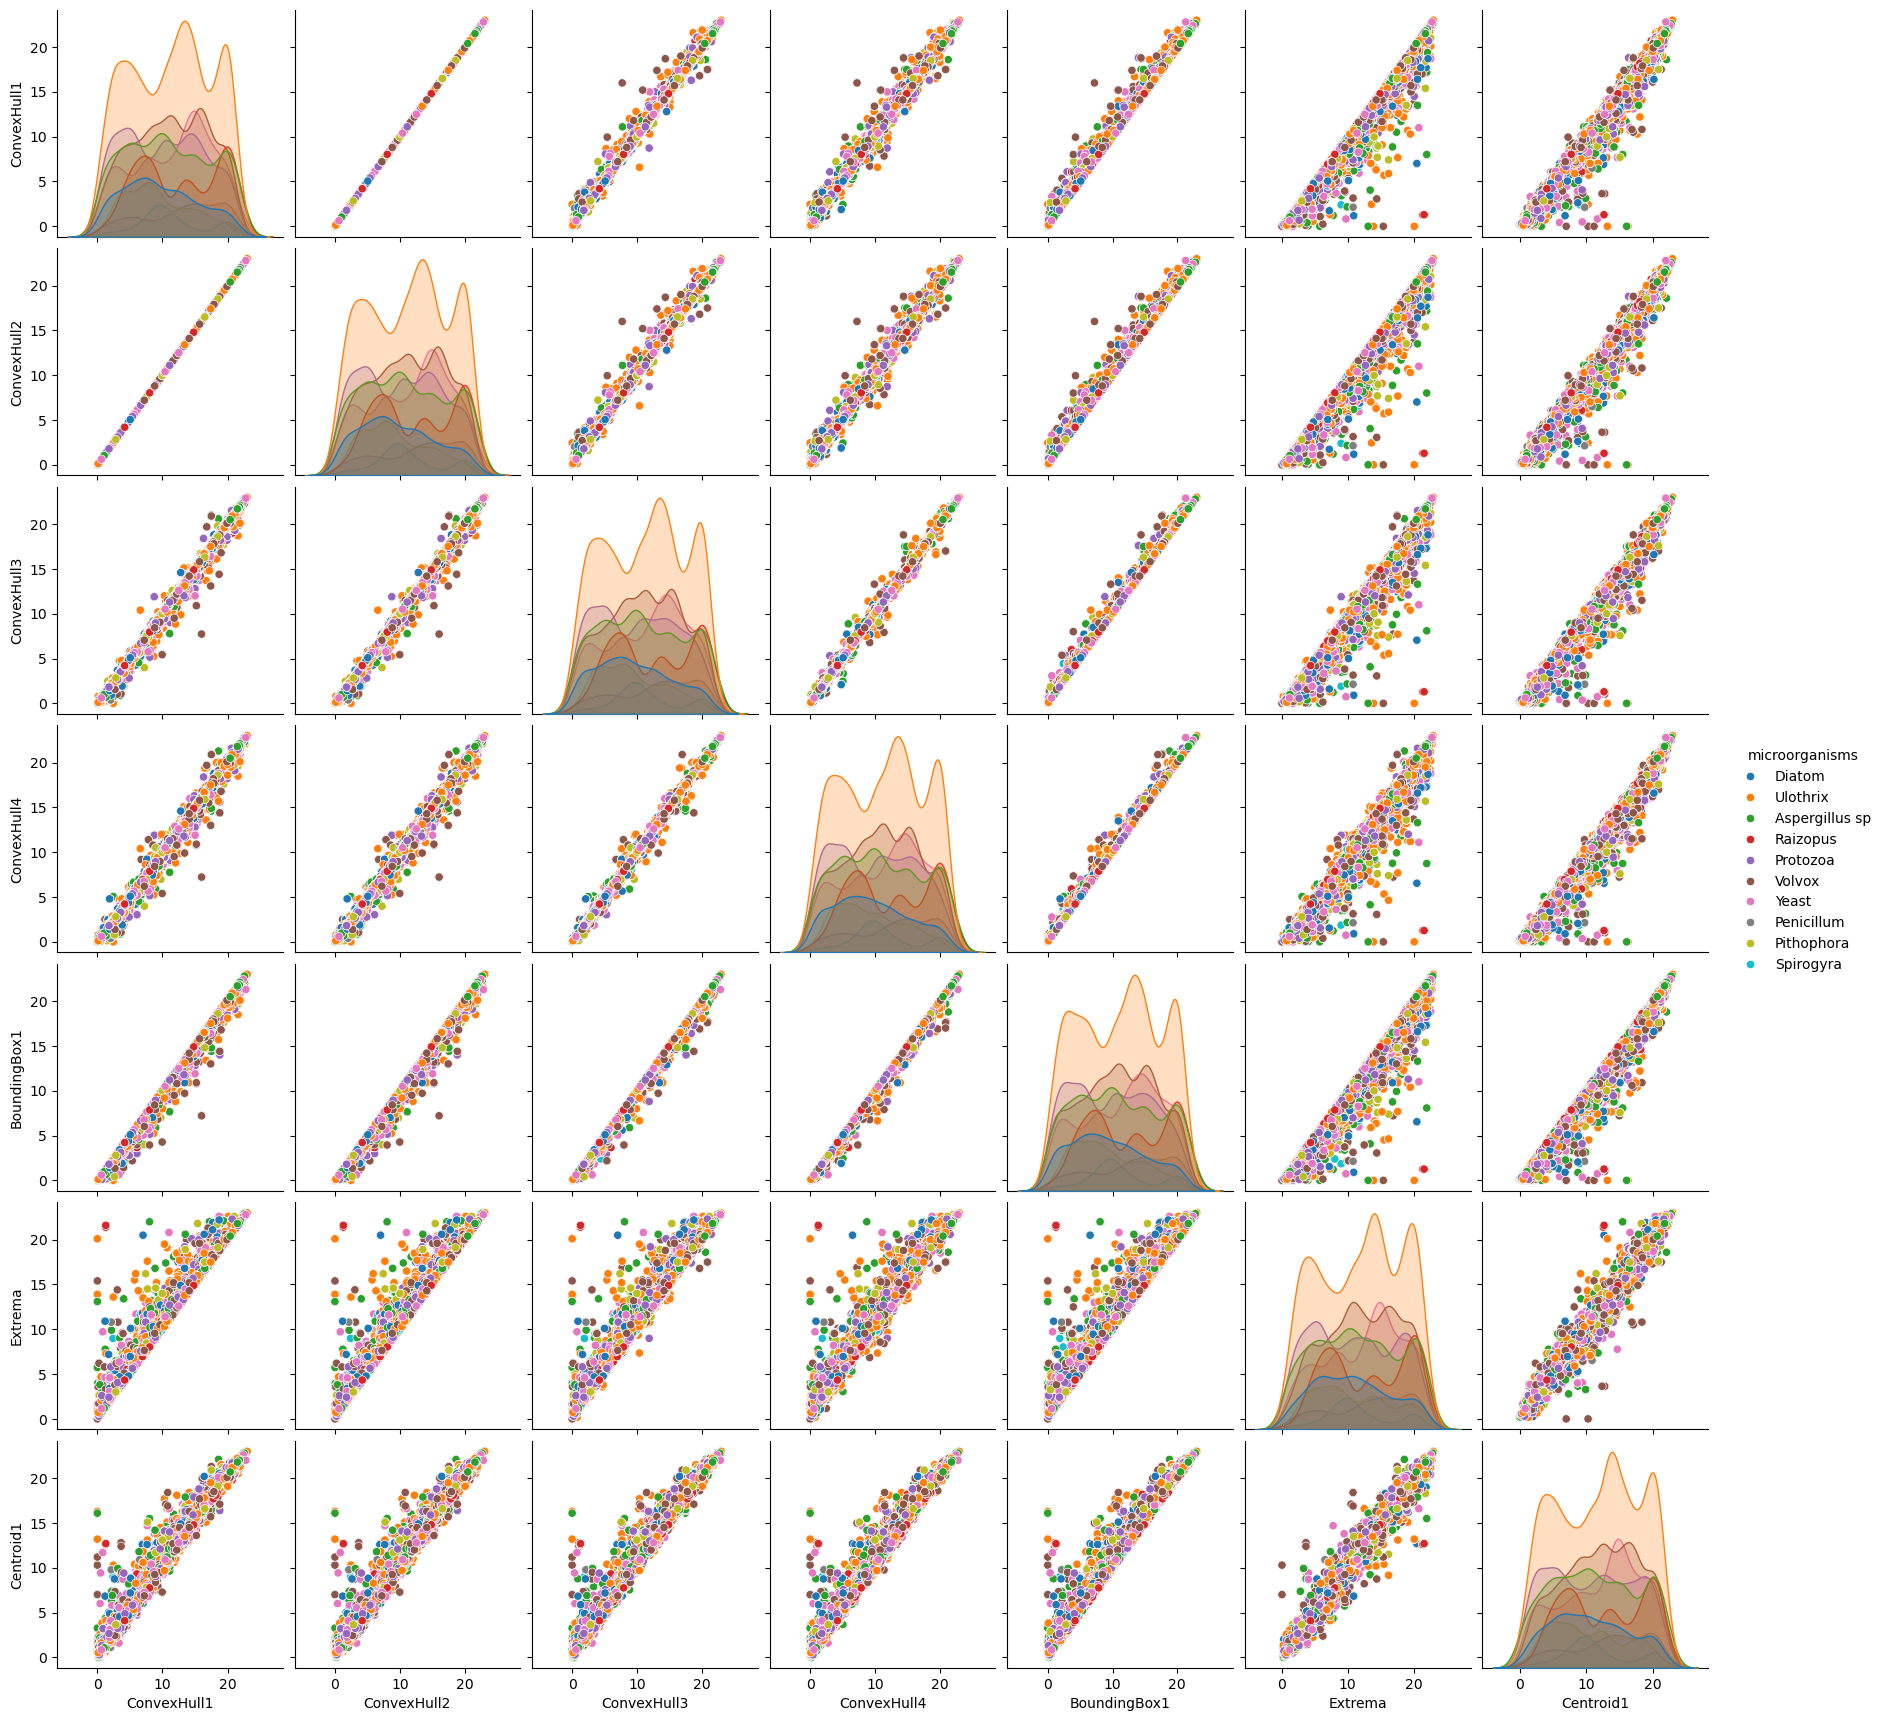

In [17]:
train_df = x_train.join(y_train)
sns.pairplot(
        data=train_df, 
        vars=train_df[['ConvexHull1', 'ConvexHull2', 'ConvexHull3', 'ConvexHull4', 'BoundingBox1', 'Extrema', 'Centroid1']],
        hue='microorganisms',
        )
plt.show()

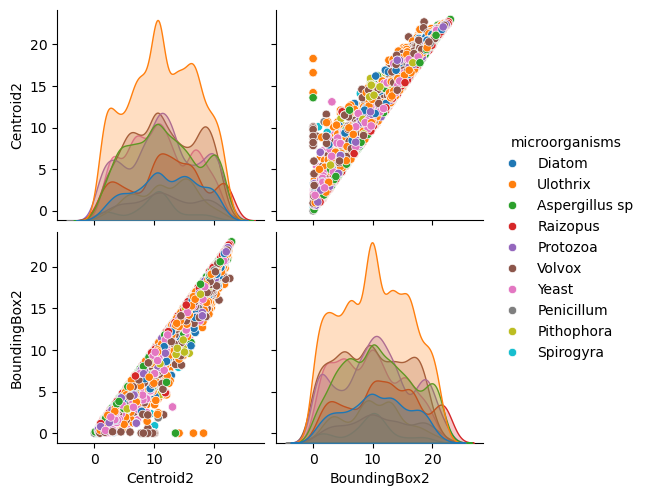

In [18]:
train_df = x_train.join(y_train)
sns.pairplot(
        data=train_df, 
        vars=train_df[['Centroid2', 'BoundingBox2', ]],
        hue='microorganisms',
        )
plt.show()

The linear dependence for all selected features is obvious, but the most strange dependence is between ConvexHull1 and ConvexHull2, so we want to compare these columns.

In [19]:
convex_hull_array = np.array(df[['ConvexHull1', 'ConvexHull2']])
print(np.sum(np.diff(convex_hull_array)))

0.0


As the difference between the entries of the ConvexHull1 and ConvexHull2 is equal to 0, we conclude that ConvexHull1=ConvexHull2 and delete this feature from data set (train and test data).

In [20]:
x_train.drop(columns='ConvexHull2', inplace=True)
x_val.drop(columns='ConvexHull2', inplace=True)
x_test.drop(columns='ConvexHull2', inplace=True)

x_train_no_dupl = train_df_no_dupl.iloc[:, :-1]
y_train_no_dupl = train_df_no_dupl.iloc[:, -1]

x_train_no_dupl.drop(columns='ConvexHull2', inplace=True)
train_df.drop(columns='ConvexHull2', inplace=True)
train_df_no_dupl.drop(columns='ConvexHull2', inplace=True)

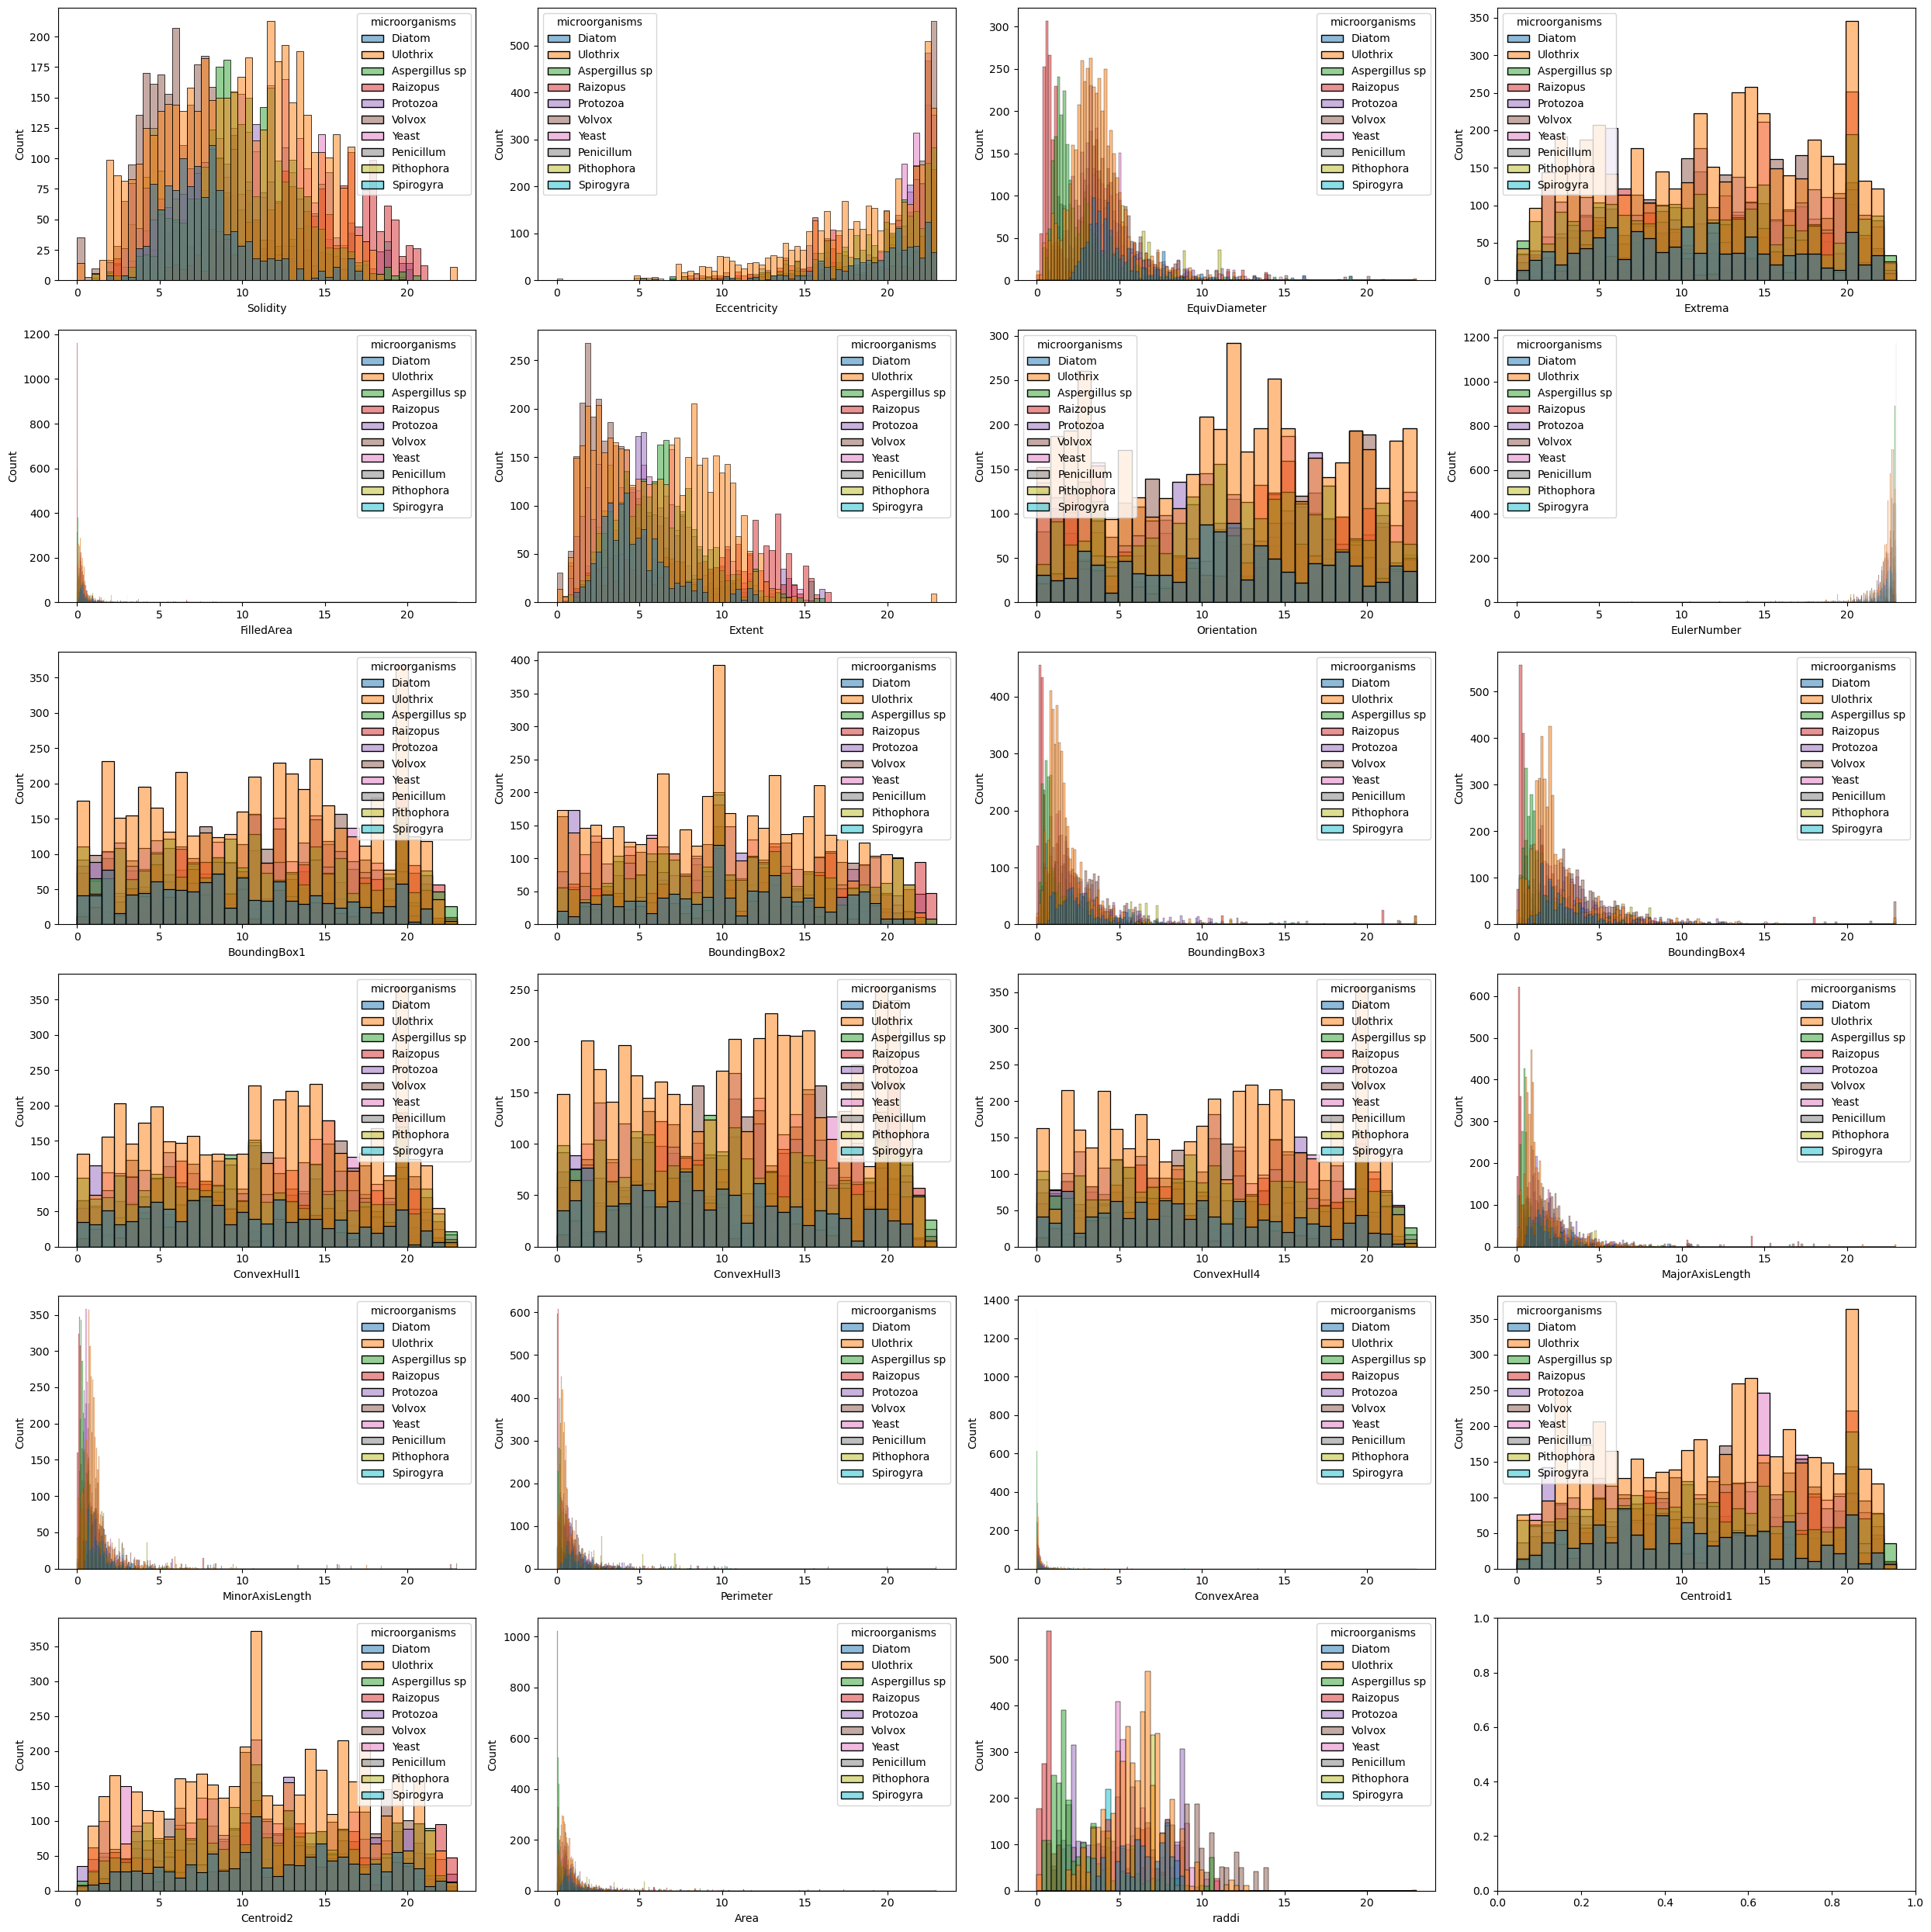

In [21]:
fig, ax = plt.subplots(6, 4, figsize=(25, 25))

for name, a in zip(train_df.columns[:-1], ax.ravel()):
  sns.histplot(data=train_df, x=name, hue="microorganisms", ax=a)

plt.tight_layout()
plt.show()

### Conclusion of EDA

We acknowledge the following problems:
1. The data set is highly imbalanced with the smallest class containing roughly 2% of data. However despite this fact we don't want to simplify the problem to binary classification or to classification of 2-3 biggest classes and will stick to multiclass classification of all given classes.
2. The data set contains outliers and is not standardised. For some classifiers (for example KNN of Logistic Regression) it is crucial for features to be in a specific range. Thus, we will use different transformers to shift and scale each feature in a suitable way.
3. The data set contains a huge amount of duplicates. However deleting them influences the distribution of the data among classes, so we don't decide to delete duplicates in advance and will study the behaviour of models with/without duplicates. 
4. The data set contains several columns with linear dependence. This issue as well will be a subject of study during modelling.
   
Model performance evaluation:  

As it states in the dataset description, the correct classification of given microorganism is crucial. Thus we assume that all classes have the same worth. Therefore, the most valuable metric for model evaluation shall be **Recall**, however, to gain a full picture of model performance we will also use **Cohen's Kappa** as it fits good with the imbalanced classification and finally a precision-recall curve to see corellation between recall and precision. It is also worth using confusion matrix to gain additional information of model performance.

### Data transformation

As data contains outliers and features take different range of values we will transform data before modelling. 
According to userguide (https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html) we would like to compare the following transformers:
1. StandardScaler. According to userguide cannot guarantee balanced feature scales in the presence of outliers. We want to use it to compare what is 'good'/'bad' result for our data set.
2. MinMaxScaler. Min and max values we will calculate depending on mean and std for each feature, s.t. min = mean - 3std, max = mean + 3std.
3. RobustScaler. The centering and scaling statistics of RobustScaler are based on percentiles and are therefore not influenced by a small number of very large marginal outliers.
4. PowerTransformer. Applies a power transformation to each feature to make the data more Gaussian-like in order to stabilize variance and minimize skewness. The optimal scaling factor is determined via maximum likelihood estimation. Has 2 variations: Yeo-Johnson and Box-Cox. Box-Cox can only be applied to strictly positive data, that is not suitable for our case because of 0 values. So we will apply Yeo-Johnson method.
5. QuantileTransformer (uniform output). Applies a non-linear transformation such that the probability density function of each feature will be mapped to a uniform or Gaussian distribution. All the data, including outliers, will be mapped to a uniform distribution with the range [0, 1], making outliers indistinguishable from inliers.
6. QuantileTransformer (Gaussian output). 
7. Normalizer. Rescales the vector for each sample to have unit norm, independently of the distribution of the samples.

## Modelling

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV, cross_validate, cross_val_predict
from sklearn.metrics import recall_score, f1_score, cohen_kappa_score, make_scorer, confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PowerTransformer, QuantileTransformer, Normalizer

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

In this section we will try each models with default parameters and then will tune them.

### kNeighborsClassifier

For better comparison of results we will save them into a dataframe. 

In [23]:
columns = [
    'Scaler',
    'Sampler',
    'With/without duplicates',
    'Weights',
    'Number of neighbors',
    'Accuracy',
    'Macro recall',
    'Macro f1',
    'Cohens Kappa'
    ]
kNN_scores = pd.DataFrame(columns=columns)

In [24]:
neigh = KNeighborsClassifier(n_neighbors=5) #default parameter
neigh.fit(x_train, y_train)
predictions = neigh.predict(x_val)

new_row = {
    'Scaler': None,
    'Sampler': None,
    'With/without duplicates': 'With',
    'Weights': 'uniform',
    'Number of neighbors': 5,
    'Accuracy': neigh.score(x_val, y_val),
    'Macro recall': recall_score(y_val, predictions, average='macro'),
    'Macro f1': f1_score(y_val, predictions, average='macro'),
    'Cohens Kappa': cohen_kappa_score(y_val, predictions),
}
new_row_df = pd.DataFrame([new_row])

kNN_scores = pd.concat([kNN_scores, new_row_df], ignore_index=True)


C:\Users\user\AppData\Local\Temp\ipykernel_15448\1613093771.py:18: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  kNN_scores = pd.concat([kNN_scores, new_row_df], ignore_index=True)


In [25]:
neigh = KNeighborsClassifier(n_neighbors=5) #default parameter
neigh.fit(x_train_no_dupl, y_train_no_dupl)
predictions = neigh.predict(x_val)
score = neigh.score(x_val, y_val)

new_row = {
    'Scaler': None,
    'Sampler': None,
    'With/without duplicates': 'Without',
    'Weights': 'uniform',
    'Number of neighbors': 5,
    'Accuracy': neigh.score(x_val, y_val),
    'Macro recall': recall_score(y_val, predictions, average='macro'),
    'Macro f1': f1_score(y_val, predictions, average='macro'),
    'Cohens Kappa': cohen_kappa_score(y_val, predictions),
}
new_row_df = pd.DataFrame([new_row])

kNN_scores = pd.concat([kNN_scores, new_row_df], ignore_index=True)

display(kNN_scores)

Scaler Sampler With/without duplicates  Weights Number of neighbors  \
0   None    None                    With  uniform                   5   
1   None    None                 Without  uniform                   5   

   Accuracy  Macro recall  Macro f1  Cohens Kappa  
0  0.898260      0.879720  0.881305      0.881878  
1  0.622518      0.535261  0.566192      0.553957

We see that data without duplicates performs significantly worse than data with duplicates, so we won't take it into account further. As well, we suppose that duplicates in our data set are normal and aren't correlated with inputes mistakes.

Next we will tune model.

Initialize scoring parameters for GridSearchCV and RandomizedSearchCV.

In [26]:
def cohen_kappa(y_true, y_pred):
    return cohen_kappa_score(y_true, y_pred)

scoring = {
    'recall_macro': 'recall_macro',
    'f1_macro': 'f1_macro',
    'cohen_kappa': make_scorer(cohen_kappa)
}

Naive search for hyperparameter number of neighbors for kNN.

In [28]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

pipe = Pipeline([
    ('kNN', KNeighborsClassifier())
    ])
    
param_search = {
    'kNN__n_neighbors': np.arange(1, 21, 1),
    }
    
gridsearch = GridSearchCV(
    pipe,
    param_grid=param_search,
    scoring=scoring,
    refit='recall_macro',
    cv=skf,
    )

gridsearch.fit(x_train, y_train)

print('Best Parameters:', gridsearch.best_params_)
print('Best macro Recall score:', gridsearch.best_score_)

print()

best_knn = gridsearch.best_estimator_
val_score = best_knn.score(x_val, y_val)
predictions = best_knn.predict(x_val)

new_row = {
    'Scaler': None,
    'Sampler': None,
    'With/without duplicates': 'With',
    'Weights': 'uniform',
    'Number of neighbors': gridsearch.best_params_['kNN__n_neighbors'],
    'Accuracy': best_knn.score(x_val, y_val),
    'Macro recall': recall_score(y_val, predictions, average='macro'),
    'Macro f1': f1_score(y_val, predictions, average='macro'),
    'Cohens Kappa': cohen_kappa_score(y_val, predictions),
}
new_row_df = pd.DataFrame([new_row])
kNN_scores = pd.concat([kNN_scores, new_row_df], ignore_index=True)

display(kNN_scores)

Best Parameters: {'kNN__n_neighbors': 1}
Best macro Recall score: 0.9446711992964142



Scaler Sampler With/without duplicates  Weights Number of neighbors  \
0   None    None                    With  uniform                   5   
1   None    None                 Without  uniform                   5   
2   None    None                    With  uniform                   1   

   Accuracy  Macro recall  Macro f1  Cohens Kappa  
0  0.898260      0.879720  0.881305      0.881878  
1  0.622518      0.535261  0.566192      0.553957  
2  0.976049      0.957682  0.963505      0.972153

Best parameter n_neighbors = 1 can indicate overestimation of a model, despite the fact that metrics on validation set show good results, so we will calculate and plot metrics for different values of this hyperparameter.

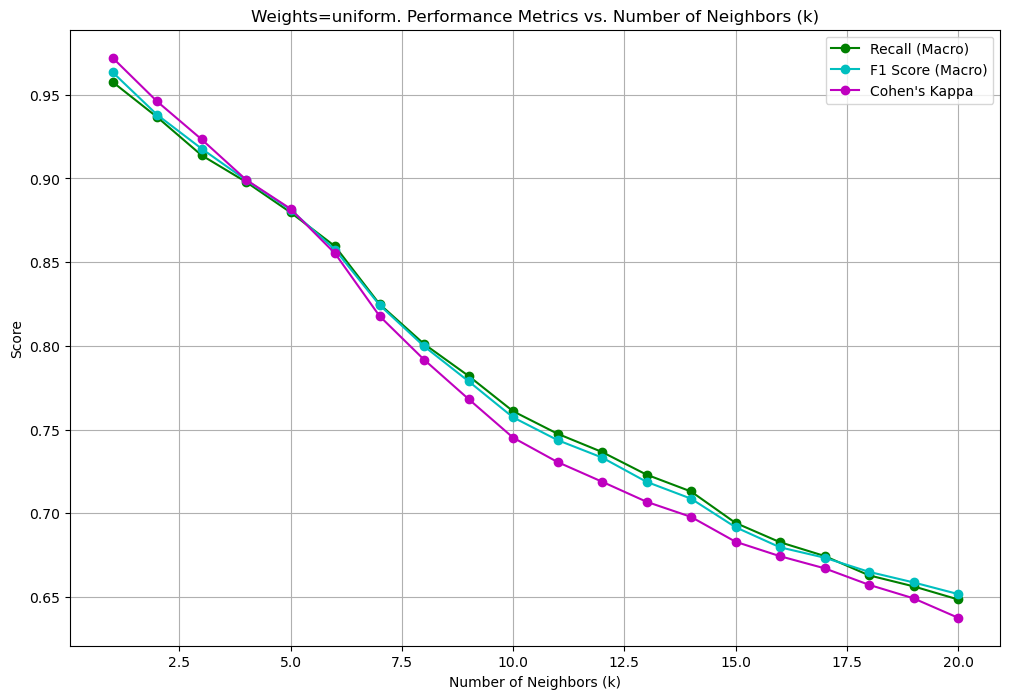

In [29]:
k_values = range(1, 21)

# Initialize lists to store the metric values
recall_macro = []
f1_macro = []
cohen_kappa = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    
    predictions = knn.predict(x_val)
    
    # Calculate metrics
    recall_macro.append(recall_score(y_val, predictions, average='macro'))
    f1_macro.append(f1_score(y_val, predictions, average='macro'))
    cohen_kappa.append(cohen_kappa_score(y_val, predictions))

plt.figure(figsize=(12, 8))

plt.plot(k_values, recall_macro, marker='o', label='Recall (Macro)', color='g')
plt.plot(k_values, f1_macro, marker='o', label='F1 Score (Macro)', color='c')
plt.plot(k_values, cohen_kappa, marker='o', label="Cohen's Kappa", color='m')

plt.title('Weights=uniform. Performance Metrics vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Score')
plt.legend()
plt.grid(True)

plt.show()

We see that all metrics decrease significantly as we increase number of neighbors.

We try to tune kNN changing the parameter weights to distance from default uniform.

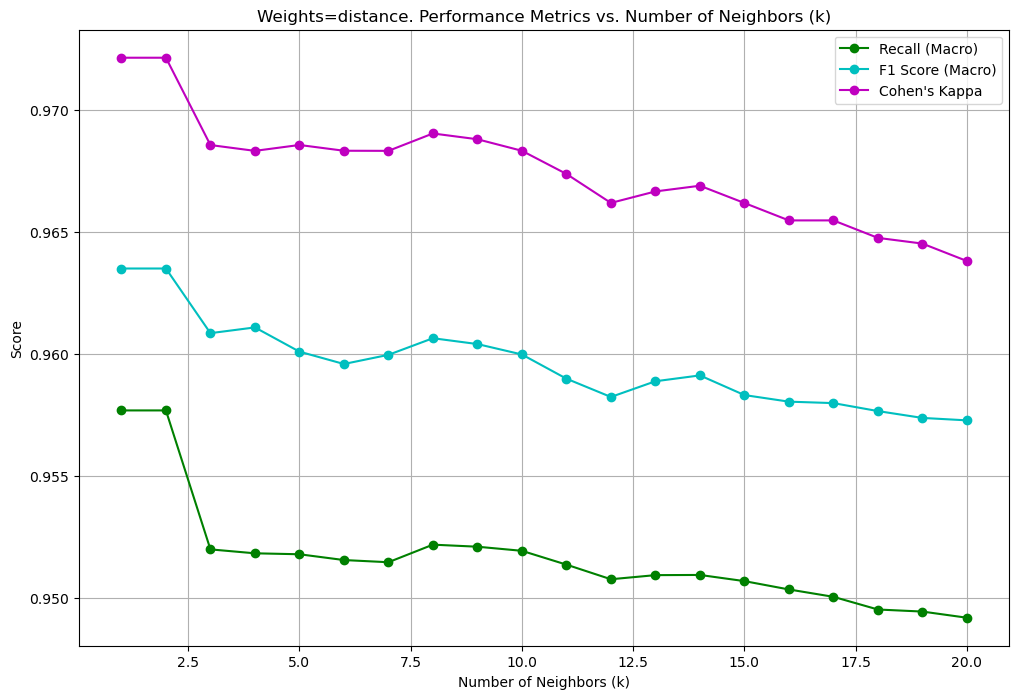

In [30]:
k_values = range(1, 21)

recall_macro = []
f1_macro = []
cohen_kappa = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn.fit(x_train, y_train)
    
    y_pred = knn.predict(x_val)
    
    recall_macro.append(recall_score(y_val, y_pred, average='macro'))
    f1_macro.append(f1_score(y_val, y_pred, average='macro'))
    cohen_kappa.append(cohen_kappa_score(y_val, y_pred))

plt.figure(figsize=(12, 8))

plt.plot(k_values, recall_macro, marker='o', label='Recall (Macro)', color='g')
plt.plot(k_values, f1_macro, marker='o', label='F1 Score (Macro)', color='c')
plt.plot(k_values, cohen_kappa, marker='o', label="Cohen's Kappa", color='m')

plt.title('Weights=distance. Performance Metrics vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Score')
plt.legend()
plt.grid(True)

plt.show()

We see that just changing of weights from uniform to distance highly improves the model. Increasing a number of Neighbors doesn't decrease scores that much anymore. 

In [31]:
neigh = KNeighborsClassifier(n_neighbors=2, weights='distance')
neigh.fit(x_train, y_train)
predictions = neigh.predict(x_val)
score = neigh.score(x_val, y_val)

new_row = {
    'Scaler': None,
    'Sampler': None,
    'With/without duplicates': 'With',
    'Weights': 'distance',
    'Number of neighbors': 2,
    'Accuracy': neigh.score(x_val, y_val),
    'Macro recall': recall_score(y_val, predictions, average='macro'),
    'Macro f1': f1_score(y_val, predictions, average='macro'),
    'Cohens Kappa': cohen_kappa_score(y_val, predictions),
}
new_row_df = pd.DataFrame([new_row])
kNN_scores = pd.concat([kNN_scores, new_row_df], ignore_index=True)

display(kNN_scores)

Scaler Sampler With/without duplicates   Weights Number of neighbors  \
0   None    None                    With   uniform                   5   
1   None    None                 Without   uniform                   5   
2   None    None                    With   uniform                   1   
3   None    None                    With  distance                   2   

   Accuracy  Macro recall  Macro f1  Cohens Kappa  
0  0.898260      0.879720  0.881305      0.881878  
1  0.622518      0.535261  0.566192      0.553957  
2  0.976049      0.957682  0.963505      0.972153  
3  0.976049      0.957682  0.963505      0.972153

In [32]:
neigh = KNeighborsClassifier(n_neighbors=3, weights='distance')
neigh.fit(x_train, y_train)
predictions = neigh.predict(x_val)
score = neigh.score(x_val, y_val)

new_row = {
    'Scaler': None,
    'Sampler': None,
    'With/without duplicates': 'With',
    'Weights': 'distance',
    'Number of neighbors': 3,
    'Accuracy': neigh.score(x_val, y_val),
    'Macro recall': recall_score(y_val, predictions, average='macro'),
    'Macro f1': f1_score(y_val, predictions, average='macro'),
    'Cohens Kappa': cohen_kappa_score(y_val, predictions),
}
new_row_df = pd.DataFrame([new_row])
kNN_scores = pd.concat([kNN_scores, new_row_df], ignore_index=True)

display(kNN_scores)

Scaler Sampler With/without duplicates   Weights Number of neighbors  \
0   None    None                    With   uniform                   5   
1   None    None                 Without   uniform                   5   
2   None    None                    With   uniform                   1   
3   None    None                    With  distance                   2   
4   None    None                    With  distance                   3   

   Accuracy  Macro recall  Macro f1  Cohens Kappa  
0  0.898260      0.879720  0.881305      0.881878  
1  0.622518      0.535261  0.566192      0.553957  
2  0.976049      0.957682  0.963505      0.972153  
3  0.976049      0.957682  0.963505      0.972153  
4  0.972979      0.951981  0.960852      0.968570

We try a few data transformers to see if data transformation impacts on model performance.
For data transformers we chosed:
1. StandardScaler.
2. RobustScaler.
3. QuantileTransformer.
Choice of RobustScaler and QuantileTransformer is made with help of sklearn guideline, that concludes that these two scalers perform the best with the outliers.

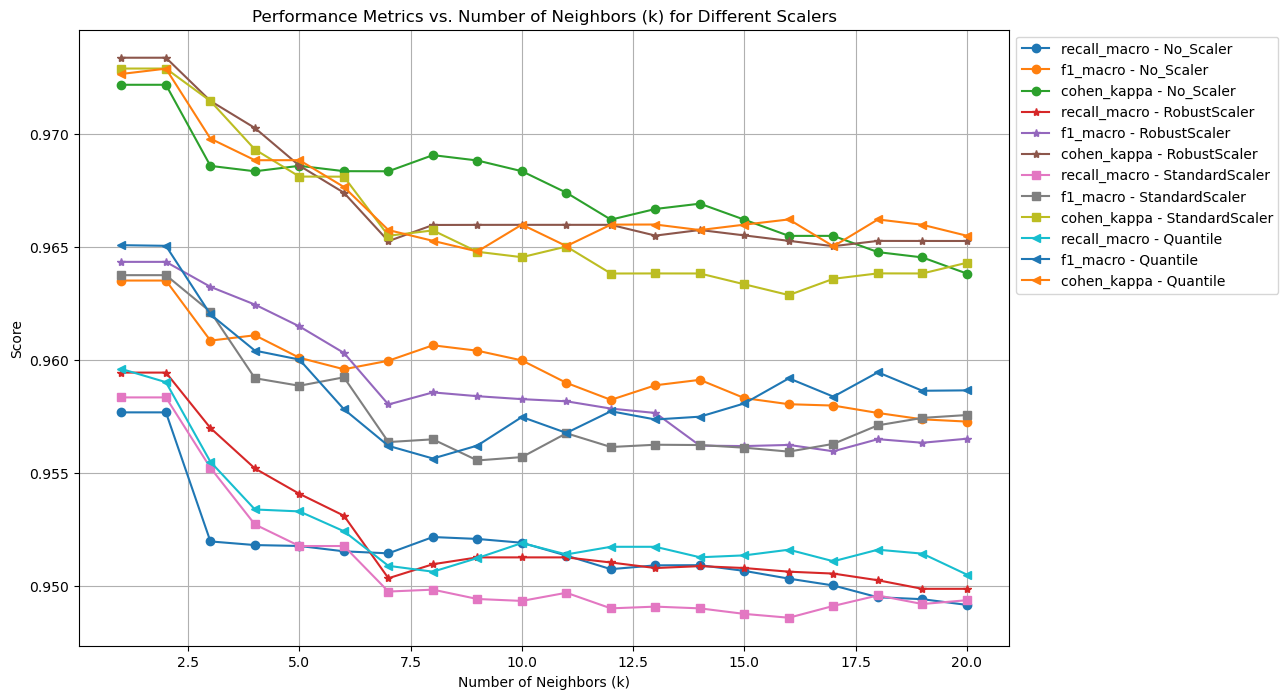

In [37]:
k_values = range(1, 21)

metrics = {
    'No_Scaler': {'recall_macro': [], 'f1_macro': [], 'cohen_kappa': []},
    'RobustScaler': {'recall_macro': [], 'f1_macro': [], 'cohen_kappa': []},
    'StandardScaler': {'recall_macro': [], 'f1_macro': [], 'cohen_kappa': []},
    'Quantile': {'recall_macro': [], 'f1_macro': [], 'cohen_kappa': []},
}

for k in k_values:
    pipe_no_scaling = Pipeline([
        ('knn', KNeighborsClassifier(n_neighbors=k, weights='distance'))
    ])
    pipe_no_scaling.fit(x_train, y_train)
    y_pred = pipe_no_scaling.predict(x_val)
    
    metrics['No_Scaler']['recall_macro'].append(recall_score(y_val, y_pred, average='macro'))
    metrics['No_Scaler']['f1_macro'].append(f1_score(y_val, y_pred, average='macro'))
    metrics['No_Scaler']['cohen_kappa'].append(cohen_kappa_score(y_val, y_pred))

transformers = [
    ('RobustScaler', RobustScaler()),
    ('StandardScaler', StandardScaler()),
    ('Quantile', QuantileTransformer()),
]

for transformer_name, transformer_obj in transformers:
    for k in k_values:
        pipe_with_scaling = Pipeline([
            ('scaler', transformer_obj),
            ('knn', KNeighborsClassifier(n_neighbors=k, weights='distance'))
        ])
        pipe_with_scaling.fit(x_train, y_train)
        y_pred = pipe_with_scaling.predict(x_val)
        
        metrics[transformer_name]['recall_macro'].append(recall_score(y_val, y_pred, average='macro'))
        metrics[transformer_name]['f1_macro'].append(f1_score(y_val, y_pred, average='macro'))
        metrics[transformer_name]['cohen_kappa'].append(cohen_kappa_score(y_val, y_pred))

# Plotting the results
plt.figure(figsize=(12, 8))
markers = {'No_Scaler': 'o', 'RobustScaler': '*', 'StandardScaler': 's', 'Quantile': '<',}

for scaler_name in metrics:
    for metric_name in metrics[scaler_name]:
        plt.plot(k_values, metrics[scaler_name][metric_name], marker=markers[scaler_name], label=f'{metric_name} - {scaler_name}')

plt.title('Performance Metrics vs. Number of Neighbors (k) for Different Scalers')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Score')
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.grid(True)
plt.show()


We don't see any significant difference between scalers and suppose that their performance is defined by weights of neighbors in kNN. So for future usage we chose RobustScaler as it shows slightly better results for recall metric for number of neighbors = 2.

In [41]:
pipe = Pipeline([
    ('robustscaler', RobustScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=2, weights='distance'))
])

pipe.fit(x_train, y_train)
predictions = pipe.predict(x_val)

new_row = {
    'Scaler': 'RobustScaler',
    'Sampler': None,
    'With/without duplicates': 'With',
    'Weights': 'distance',
    'Number of neighbors': 2,
    'Accuracy': pipe.score(x_val, y_val),
    'Macro recall': recall_score(y_val, predictions, average='macro'),
    'Macro f1': f1_score(y_val, predictions, average='macro'),
    'Cohens Kappa': cohen_kappa_score(y_val, predictions),
}
new_row_df = pd.DataFrame([new_row])
kNN_scores = pd.concat([kNN_scores, new_row_df], ignore_index=True)

display(kNN_scores)

Scaler Sampler With/without duplicates   Weights Number of neighbors  \
0          None    None                    With   uniform                   5   
1          None    None                 Without   uniform                   5   
2          None    None                    With   uniform                   1   
3          None    None                    With  distance                   2   
4          None    None                    With  distance                   3   
5  RobustScaler    None                    With  distance                   2   

   Accuracy  Macro recall  Macro f1  Cohens Kappa  
0  0.898260      0.879720  0.881305      0.881878  
1  0.622518      0.535261  0.566192      0.553957  
2  0.976049      0.957682  0.963505      0.972153  
3  0.976049      0.957682  0.963505      0.972153  
4  0.972979      0.951981  0.960852      0.968570  
5  0.977073      0.959439  0.964331      0.973349

In [42]:
pipe = Pipeline([
    ('robustscaler', RobustScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=3, weights='distance'))
])

pipe.fit(x_train, y_train)
predictions = pipe.predict(x_val)

new_row = {
    'Scaler': 'RobustScaler',
    'Sampler': None,
    'With/without duplicates': 'With',
    'Weights': 'distance',
    'Number of neighbors': 3,
    'Accuracy': pipe.score(x_val, y_val),
    'Macro recall': recall_score(y_val, predictions, average='macro'),
    'Macro f1': f1_score(y_val, predictions, average='macro'),
    'Cohens Kappa': cohen_kappa_score(y_val, predictions),
}
new_row_df = pd.DataFrame([new_row])
kNN_scores = pd.concat([kNN_scores, new_row_df], ignore_index=True)

display(kNN_scores)

Scaler Sampler With/without duplicates   Weights Number of neighbors  \
0          None    None                    With   uniform                   5   
1          None    None                 Without   uniform                   5   
2          None    None                    With   uniform                   1   
3          None    None                    With  distance                   2   
4          None    None                    With  distance                   3   
5  RobustScaler    None                    With  distance                   2   
6  RobustScaler    None                    With  distance                   3   

   Accuracy  Macro recall  Macro f1  Cohens Kappa  
0  0.898260      0.879720  0.881305      0.881878  
1  0.622518      0.535261  0.566192      0.553957  
2  0.976049      0.957682  0.963505      0.972153  
3  0.976049      0.957682  0.963505      0.972153  
4  0.972979      0.951981  0.960852      0.968570  
5  0.977073      0.959439  0.964331      0.973349  
6  0.975435      0.956991  0.963228      0.971439

Next we try different samplers to work with imbalance.

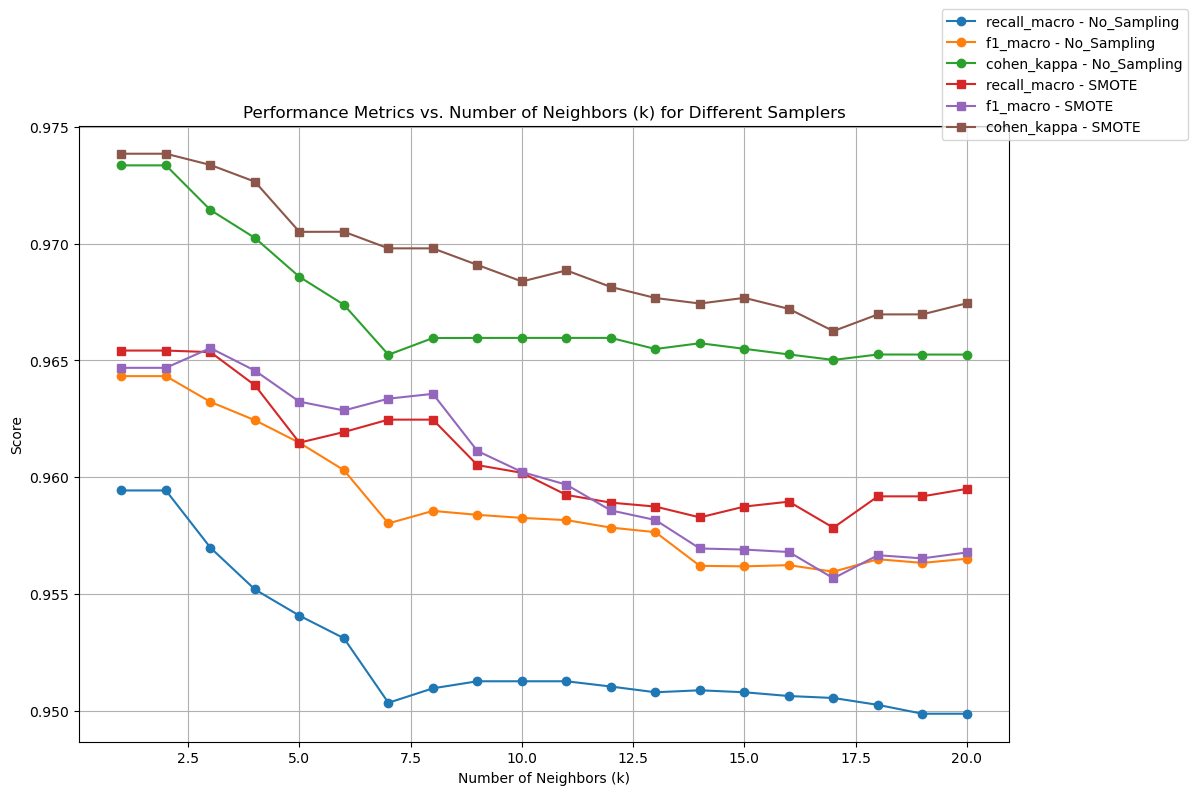

In [40]:
k_values = range(1, 21)

metrics = {
    'No_Sampling': {'recall_macro': [], 'f1_macro': [], 'cohen_kappa': []},
    'RandomUnderSampler': {'recall_macro': [], 'f1_macro': [], 'cohen_kappa': []},
    'SMOTE': {'recall_macro': [], 'f1_macro': [], 'cohen_kappa': []},
}

for k in k_values:
    pipe_no_sampling = Pipeline([
        ('robustscaler', RobustScaler()),
        ('knn', KNeighborsClassifier(n_neighbors=k, weights='distance'))
    ])
    pipe_no_sampling.fit(x_train, y_train)
    y_pred = pipe_no_sampling.predict(x_val)
    
    metrics['No_Sampling']['recall_macro'].append(recall_score(y_val, y_pred, average='macro'))
    metrics['No_Sampling']['f1_macro'].append(f1_score(y_val, y_pred, average='macro'))
    metrics['No_Sampling']['cohen_kappa'].append(cohen_kappa_score(y_val, y_pred))

samplers = [
    ('RandomUnderSampler', RandomUnderSampler(random_state=42)),
    ('SMOTE', SMOTE(random_state=42)),
]

for sampler_name, sampler_obj in samplers:
    for k in k_values:
        pipe_with_sampling = ImbPipeline([
            ('robustscaler', RobustScaler()),
            ('sampler', sampler_obj),
            ('knn', KNeighborsClassifier(n_neighbors=k, weights='distance'))
        ])
        pipe_with_sampling.fit(x_train, y_train)
        y_pred = pipe_with_sampling.predict(x_val)

        metrics[sampler_name]['recall_macro'].append(recall_score(y_val, y_pred, average='macro'))
        metrics[sampler_name]['f1_macro'].append(f1_score(y_val, y_pred, average='macro'))
        metrics[sampler_name]['cohen_kappa'].append(cohen_kappa_score(y_val, y_pred))

# Plotting the results
plt.figure(figsize=(12, 8))
markers = {'No_Sampling': 'o', 'RandomUnderSampler': 'v', 'SMOTE':'s'}

for sampler_name in metrics:
    for metric_name in metrics[sampler_name]:
        plt.plot(k_values, metrics[sampler_name][metric_name], marker=markers[sampler_name], label=f'{metric_name} - {sampler_name}')

plt.title('Performance Metrics vs. Number of Neighbors (k) for Different Samplers')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Score')
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 8))

for sampler_name in metrics:
    if sampler_name == 'RandomUnderSampler':
        continue
    for metric_name in metrics[sampler_name]:
        plt.plot(k_values, metrics[sampler_name][metric_name], marker=markers[sampler_name], label=f'{metric_name} - {sampler_name}')

plt.title('Performance Metrics vs. Number of Neighbors (k) for Different Samplers')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Score')
plt.legend(bbox_to_anchor=(1.2, 1.2))
plt.grid(True)
plt.show()


From the graph we observe that SMOTE gives the best results. Significantly worse then other samplers perform RandomUnderSampler.

In [43]:
pipe = ImbPipeline([
    ('robustscaler', RobustScaler()),
    ('SMOTE', SMOTE(random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=2, weights='distance'))
])

pipe.fit(x_train, y_train)
predictions = pipe.predict(x_val)

new_row = {
    'Scaler': 'RobustScaler',
    'Sampler': 'SMOTE',
    'With/without duplicates': 'With',
    'Weights': 'distance',
    'Number of neighbors': 2,
    'Accuracy': pipe.score(x_val, y_val),
    'Macro recall': recall_score(y_val, predictions, average='macro'),
    'Macro f1': f1_score(y_val, predictions, average='macro'),
    'Cohens Kappa': cohen_kappa_score(y_val, predictions),
}
new_row_df = pd.DataFrame([new_row])
kNN_scores = pd.concat([kNN_scores, new_row_df], ignore_index=True)

display(kNN_scores)

Scaler Sampler With/without duplicates   Weights Number of neighbors  \
0          None    None                    With   uniform                   5   
1          None    None                 Without   uniform                   5   
2          None    None                    With   uniform                   1   
3          None    None                    With  distance                   2   
4          None    None                    With  distance                   3   
5  RobustScaler    None                    With  distance                   2   
6  RobustScaler    None                    With  distance                   3   
7  RobustScaler   SMOTE                    With  distance                   2   

   Accuracy  Macro recall  Macro f1  Cohens Kappa  
0  0.898260      0.879720  0.881305      0.881878  
1  0.622518      0.535261  0.566192      0.553957  
2  0.976049      0.957682  0.963505      0.972153  
3  0.976049      0.957682  0.963505      0.972153  
4  0.972979      0.951981  0.960852      0.968570  
5  0.977073      0.959439  0.964331      0.973349  
6  0.975435      0.956991  0.963228      0.971439  
7  0.977482      0.965424  0.964686      0.973847

In [44]:
pipe = ImbPipeline([
    ('robustscaler', RobustScaler()),
    ('SMOTE', SMOTE(random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=3, weights='distance'))
])

pipe.fit(x_train, y_train)
predictions = pipe.predict(x_val)

new_row = {
    'Scaler': 'RobustScaler',
    'Sampler': 'SMOTE',
    'With/without duplicates': 'With',
    'Weights': 'distance',
    'Number of neighbors': 3,
    'Accuracy': pipe.score(x_val, y_val),
    'Macro recall': recall_score(y_val, predictions, average='macro'),
    'Macro f1': f1_score(y_val, predictions, average='macro'),
    'Cohens Kappa': cohen_kappa_score(y_val, predictions),
}
new_row_df = pd.DataFrame([new_row])
kNN_scores = pd.concat([kNN_scores, new_row_df], ignore_index=True)

display(kNN_scores)

Scaler Sampler With/without duplicates   Weights Number of neighbors  \
0          None    None                    With   uniform                   5   
1          None    None                 Without   uniform                   5   
2          None    None                    With   uniform                   1   
3          None    None                    With  distance                   2   
4          None    None                    With  distance                   3   
5  RobustScaler    None                    With  distance                   2   
6  RobustScaler    None                    With  distance                   3   
7  RobustScaler   SMOTE                    With  distance                   2   
8  RobustScaler   SMOTE                    With  distance                   3   

   Accuracy  Macro recall  Macro f1  Cohens Kappa  
0  0.898260      0.879720  0.881305      0.881878  
1  0.622518      0.535261  0.566192      0.553957  
2  0.976049      0.957682  0.963505      0.972153  
3  0.976049      0.957682  0.963505      0.972153  
4  0.972979      0.951981  0.960852      0.968570  
5  0.977073      0.959439  0.964331      0.973349  
6  0.975435      0.956991  0.963228      0.971439  
7  0.977482      0.965424  0.964686      0.973847  
8  0.977073      0.965358  0.965532      0.973366

Make confusion matrix.

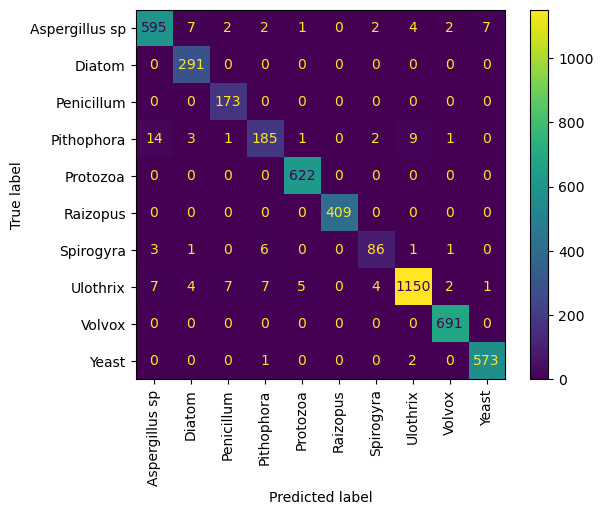

In [59]:
pipe = ImbPipeline([
    ('robustscaler', RobustScaler()),
    ('SMOTE', SMOTE(random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=2, weights='distance'))
])
pipe.fit(x_train, y_train)
predictions = pipe.predict(x_val)
cm = confusion_matrix(y_val, predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipe.classes_)
disp.plot(cmap='viridis')
plt.xticks(rotation=90)
plt.show()


As we are dealing with multiclass classification, threshold is of no use.

Finally we validate our model with the best found params on actual test data and do confusion matrix.

Accuracy: 0.981821159515231
Macro recall: 0.9673836218861582
Macro f1: 0.9695353119899405
Cohens Kappa: 0.9788805809882789


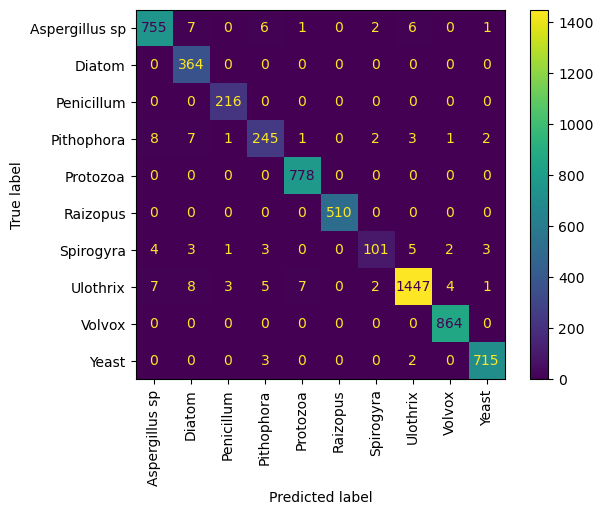

In [58]:
pipe = ImbPipeline([
    ('robustscaler', RobustScaler()),
    ('SMOTE', SMOTE(random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=2, weights='distance'))
])
pipe.fit(x_train, y_train)
predictions = pipe.predict(x_test)
cm = confusion_matrix(y_test, predictions)
print('Accuracy:', pipe.score(x_test, y_test))
print('Macro recall:', recall_score(y_test, predictions, average='macro'))
print('Macro f1:', f1_score(y_test, predictions, average='macro'))
print('Cohens Kappa:', cohen_kappa_score(y_test, predictions))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipe.classes_)
disp.plot(cmap='viridis')
plt.xticks(rotation=90)
plt.show()

### Logistic regression

In [ ]:
logreg_quick_scores = pd.DataFrame(data=data, index=np.arange(len(list_of_scalers)))

In [ ]:
'''
for count, x_train_scale in enumerate(x_train_scaled):

    logreg = LogisticRegression(multi_class='multinomial', max_iter=50_000)

    scores = cross_validate(logreg,
                        x_train_scale,
                        y_train,
                        cv=skf, 
                        return_train_score=True)
    
    predictions = cross_val_predict(logreg,
                                x_train_scale,
                                y_train,
                                cv=skf,
                                method='predict',
                                )

    logreg_quick_scores.loc[count] = [
        list_of_scalers[count],
        scores['train_score'].mean(),
        scores['test_score'].mean(),
        recall_score(y_train, predictions, average='weighted'),
        recall_score(y_train, predictions, average='macro'),
        f1_score(y_train, predictions, average='weighted'),
        f1_score(y_train, predictions, average='macro'),
        cohen_kappa_score(y_train, predictions)
        ]

display(logreg_quick_scores)
'''

In [ ]:
smote_pipe_logreg = ImbPipeline([
    ('smote', SMOTE(random_state=73)),
    ('rbscaler', RobustScaler()),
    ('logreg', LogisticRegression(max_iter=20_000))
])

param_grid_logreg = {'smote__k_neighbors': np.arange(1, 10, 1),
              'logreg__tol': np.arange(0, 1.1, 0.1)}

smote_grid_logreg = GridSearchCV(smote_pipe_logreg, param_grid=param_grid_logreg, scoring='recall_weighted', cv=5)

smote_grid_logreg.fit(x_train_no_dupl, y_train_no_dupl)

print(smote_grid_logreg.best_params_)
print(smote_grid_logreg.best_score_)

In [ ]:
sm_best = SMOTE(sampling_strategy='auto', k_neighbors=smote_grid_knn.best_params_['smote__k_neighbors'], random_state=73)
X_smoted_best, Y_smoted_best = sm_best.fit_resample(x_train_no_dupl, y_train_no_dupl)

Lets now look at the graphs.

In [ ]:
plt.rcParams['legend.loc'] = 'best'
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharex=True, sharey=True, figsize=(26, 9))
sns.scatterplot(x='Solidity', y='raddi', hue='microorganisms', data=train_df_no_dupl, palette='Set1',
                s=40, alpha=0.5, edgecolor='b', ax=ax1)
sns.scatterplot(x='Solidity', y='raddi', hue='microorganisms', data=X_under.join(Y_under), palette='Set1',
                s=40, alpha=0.5, edgecolor='b', ax=ax2)
sns.scatterplot(x='Solidity', y='raddi', hue='microorganisms', data=X_over.join(Y_over), palette='Set1',
                s=40, alpha=0.4, edgecolor='b', ax=ax3)
sns.scatterplot(x='Solidity', y='raddi', hue='microorganisms', data=X_smoted_best.join(Y_smoted_best), palette='Set1',
                s=40, alpha=0.4, edgecolor='b', ax=ax4)

ax1.set_title('initial')
ax2.set_title('UNDERsampled')
ax3.set_title('OVERsampled')
ax4.set_title(f"SMOTEd with k_neighbors = {smote_grid_knn.best_params_['smote__k_neighbors']}")
ax1.legend_.remove()
ax2.legend_.remove()
ax3.legend_.remove()
ax4.legend_.remove()

handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, title='class')

plt.suptitle('resampling techniques comparison', fontsize=20)


plt.tight_layout()
plt.show()

And check new available distributions.

In [ ]:
initial_distr = y_train.value_counts(normalize=True)*100
rus_distr = Y_under.value_counts(normalize=True)*100
ros_distr = Y_over.value_counts(normalize=True)*100
sm_distr = Y_smoted_best.value_counts(normalize=True)*100

fig, ax = plt.subplots(figsize=(20, 8))
plt.rcParams.update({'font.size': 14})
indices = np.arange(0,10,1)

bar_width = 0.2
bars1 = ax.bar(indices, initial_distr, bar_width, label='initial (without duplicates)', color='blue', alpha=0.6)
bars2 = ax.bar(indices + bar_width, rus_distr, bar_width, label='randomUNDERsampling', color='green', alpha=0.6)
bars3 = ax.bar(indices + 2*bar_width, ros_distr, bar_width, label='randomOVERsampling', color='red', alpha=0.6)
bars4 = ax.bar(indices + 3*bar_width, sm_distr, bar_width, label=f"SMOTEd with k_neighbors = {smote_grid_knn.best_params_['smote__k_neighbors']}", color='purple', alpha=0.6)

ax.set_ylabel('percentage')
ax.set_xticks(indices + bar_width / 2, y_train.unique())
ax.set_xticklabels(initial_distr.index)


plt.title('Distribution of classes')
plt.xticks(rotation= -35)
plt.grid()
plt.legend()

Thus the dataset is now balanced. However, we need to look at the amount of samples after each sampling technique.

In [ ]:
print('smallest class in')
print(' initial dataset: ', train_df_no_dupl['microorganisms'].value_counts().min())
print(' UNDERsampled: ', X_under.join(Y_under)['microorganisms'].value_counts().min())
print(' OVERsampled: ', X_over.join(Y_over)['microorganisms'].value_counts().min())
print(' SMOTEd: ', X_smoted_best.join(Y_smoted_best)['microorganisms'].value_counts().min())

print()
print('biggest class in')
print(' initial dataset: ', train_df_no_dupl['microorganisms'].value_counts().max())
print(' UNDERsampled: ', X_under.join(Y_under)['microorganisms'].value_counts().max())
print(' OVERsampled: ', X_over.join(Y_over)['microorganisms'].value_counts().max())
print(' SMOTEd: ', X_smoted_best.join(Y_smoted_best)['microorganisms'].value_counts().max())


In [ ]:
from sklearn.metrics import make_scorer 

pipe = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('quantile', QuantileTransformer()),
    ('PCA', PCA(random_state=73)),
    ('logreg', LogisticRegression(solver='lbfgs', max_iter=50_000))
])

param_search = {
    'smote__k_neighbors': np.arange(1, 20, 1),
    'quantile__output_distribution': ['uniform', 'normal'],
    'PCA__n_components': np.arange(1, 23, 1),
    }

def cohen_kappa(y_true, y_pred):
    return cohen_kappa_score(y_true, y_pred)

scoring = {
    'recall_macro': 'recall_macro',
    'f1_macro': 'f1_macro',
    'cohen_kappa': make_scorer(cohen_kappa)
}

randomsearch = RandomizedSearchCV(pipe, param_distributions=param_search, scoring=scoring, refit='recall_macro', random_state=42, cv=5)

randomsearch.fit(x_train, y_train)

print("Best Parameters: ", randomsearch.best_params_)
print("Best macro Recall Score: ", randomsearch.best_score_)

print()

results = randomsearch.cv_results_

for metric in scoring.keys():
    best_index = np.argmax(results['mean_test_' + metric])
    best_score = results['mean_test_' + metric][best_index]
    print(f"Best {metric} score: {best_score}")

print()

best_estimator = randomsearch.best_estimator_
cv_results = cross_validate(best_estimator, x_train, y_train, cv=5, scoring=scoring, return_train_score=False)
for metric in scoring.keys():
    scores = cv_results['test_' + metric]
    print(f"{metric} scores: {scores}")
    print(f"Mean {metric} score: {np.mean(scores)}")
    print(f"Standard deviation {metric} score: {np.std(scores)}")


In [ ]:
from sklearn.metrics import make_scorer 

pipe = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('quantile', QuantileTransformer()),
    ('PCA', PCA(random_state=73)),
    ('logreg', LogisticRegression(random_state=73, max_iter=50_000))
])

param_search = {
    'smote__k_neighbors': np.arange(1, 20, 1),
    'quantile__output_distribution': ['uniform', 'normal'],
    'PCA__n_components': np.arange(1, 23, 1),
    'logreg__solver': ['newton-cg', 'sag', 'saga'], 

    }

def cohen_kappa(y_true, y_pred):
    return cohen_kappa_score(y_true, y_pred)

scoring = {
    'recall_weighted': 'recall_weighted',
    'recall_macro': 'recall_macro',
    'f1_weighted': 'f1_weighted',
    'f1_macro': 'f1_macro',
    'cohen_kappa': make_scorer(cohen_kappa)
}

randomsearch = RandomizedSearchCV(pipe, param_distributions=param_search, scoring=scoring, refit='recall_weighted', random_state=42, cv=5)

randomsearch.fit(x_train, y_train)

print("Best Parameters: ", randomsearch.best_params_)
print("Best Weighted Recall Score: ", randomsearch.best_score_)

print()

results = randomsearch.cv_results_

for metric in scoring.keys():
    best_index = np.argmax(results['mean_test_' + metric])
    best_score = results['mean_test_' + metric][best_index]
    print(f"Best {metric} score: {best_score}")

print()

best_estimator = randomsearch.best_estimator_
cv_results = cross_validate(best_estimator, x_train, y_train, cv=5, scoring=scoring, return_train_score=False)
for metric in scoring.keys():
    scores = cv_results['test_' + metric]
    print(f"{metric} scores: {scores}")
    print(f"Mean {metric} score: {np.mean(scores)}")
    print(f"Standard deviation {metric} score: {np.std(scores)}")


The same without duplicates

In [ ]:
from sklearn.metrics import make_scorer 

pipe = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('quantile', QuantileTransformer()),
    ('PCA', PCA(random_state=73)),
    ('logreg', LogisticRegression(random_state=73, max_iter=50_000))
])

param_search = {
    'smote__k_neighbors': np.arange(1, 20, 1),
    'quantile__output_distribution': ['uniform', 'normal'],
    'PCA__n_components': np.arange(1, 23, 1),
    'logreg__solver': ['newton-cg', 'sag', 'saga'], 

    }

def cohen_kappa(y_true, y_pred):
    return cohen_kappa_score(y_true, y_pred)

scoring = {
    'recall_weighted': 'recall_weighted',
    'recall_macro': 'recall_macro',
    'f1_weighted': 'f1_weighted',
    'f1_macro': 'f1_macro',
    'cohen_kappa': make_scorer(cohen_kappa)
}

randomsearch = RandomizedSearchCV(pipe, param_distributions=param_search, scoring=scoring, refit='recall_weighted', random_state=42, cv=5)

randomsearch.fit(x_train_no_dupl, y_train_no_dupl)

print("Best Parameters: ", randomsearch.best_params_)
print("Best Weighted Recall Score: ", randomsearch.best_score_)

print()

results = randomsearch.cv_results_

for metric in scoring.keys():
    best_index = np.argmax(results['mean_test_' + metric])
    best_score = results['mean_test_' + metric][best_index]
    print(f"Best {metric} score: {best_score}")

print()

best_estimator = randomsearch.best_estimator_
cv_results = cross_validate(best_estimator, x_train_no_dupl, y_train_no_dupl, cv=5, scoring=scoring, return_train_score=False)
for metric in scoring.keys():
    scores = cv_results['test_' + metric]
    print(f"{metric} scores: {scores}")
    print(f"Mean {metric} score: {np.mean(scores)}")
    print(f"Standard deviation {metric} score: {np.std(scores)}")


### RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.metrics import make_scorer 

pipe = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('quantile', QuantileTransformer()),
    ('PCA', PCA(random_state=73)),
    ('random_forest', RandomForestClassifier(random_state=73))
])

param_search = {
    'smote__k_neighbors': np.arange(1, 20, 1),
    'quantile__output_distribution': ['uniform', 'normal'],
    'PCA__n_components': np.arange(1, 23, 1), 
    'random_forest__n_estimators': np.arange(1, 100, 1),
    }

def cohen_kappa(y_true, y_pred):
    return cohen_kappa_score(y_true, y_pred)

scoring = {
    'recall_weighted': 'recall_weighted',
    'recall_macro': 'recall_macro',
    'f1_weighted': 'f1_weighted',
    'f1_macro': 'f1_macro',
    'cohen_kappa': make_scorer(cohen_kappa)
}

randomsearch = RandomizedSearchCV(pipe, param_distributions=param_search, scoring=scoring, refit='recall_weighted', random_state=42, cv=5)

randomsearch.fit(x_train, y_train)

print("Best Parameters: ", randomsearch.best_params_)
print("Best Weighted Recall Score: ", randomsearch.best_score_)

print()

results = randomsearch.cv_results_

for metric in scoring.keys():
    best_index = np.argmax(results['mean_test_' + metric])
    best_score = results['mean_test_' + metric][best_index]
    print(f"Best {metric} score: {best_score}")

print()

best_estimator = randomsearch.best_estimator_
cv_results = cross_validate(best_estimator, x_train, y_train, cv=5, scoring=scoring, return_train_score=False)
for metric in scoring.keys():
    scores = cv_results['test_' + metric]
    print(f"{metric} scores: {scores}")
    print(f"Mean {metric} score: {np.mean(scores)}")
    print(f"Standard deviation {metric} score: {np.std(scores)}")

The same without duplicates.

In [ ]:
from sklearn.metrics import make_scorer 

pipe = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('quantile', QuantileTransformer()),
    ('PCA', PCA(random_state=73)),
    ('random_forest', RandomForestClassifier(random_state=73))
])

param_search = {
    'smote__k_neighbors': np.arange(1, 20, 1),
    'quantile__output_distribution': ['uniform', 'normal'],
    'PCA__n_components': np.arange(1, 23, 1), 
    'random_forest__n_estimators': np.arange(1, 100, 1),
    }

def cohen_kappa(y_true, y_pred):
    return cohen_kappa_score(y_true, y_pred)

scoring = {
    'recall_weighted': 'recall_weighted',
    'recall_macro': 'recall_macro',
    'f1_weighted': 'f1_weighted',
    'f1_macro': 'f1_macro',
    'cohen_kappa': make_scorer(cohen_kappa)
}

randomsearch = RandomizedSearchCV(pipe, param_distributions=param_search, scoring=scoring, refit='recall_weighted', random_state=42, cv=5)

randomsearch.fit(x_train_no_dupl, y_train_no_dupl)

print("Best Parameters: ", randomsearch.best_params_)
print("Best Weighted Recall Score: ", randomsearch.best_score_)

print()

results = randomsearch.cv_results_

for metric in scoring.keys():
    best_index = np.argmax(results['mean_test_' + metric])
    best_score = results['mean_test_' + metric][best_index]
    print(f"Best {metric} score: {best_score}")

print()

best_estimator = randomsearch.best_estimator_
cv_results = cross_validate(best_estimator, x_train_no_dupl, y_train_no_dupl, cv=5, scoring=scoring, return_train_score=False)
for metric in scoring.keys():
    scores = cv_results['test_' + metric]
    print(f"{metric} scores: {scores}")
    print(f"Mean {metric} score: {np.mean(scores)}")
    print(f"Standard deviation {metric} score: {np.std(scores)}")